<a href="https://colab.research.google.com/github/Angelalena23/Python-Projects/blob/main/GROUP_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA PREPARATION



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import seaborn as sns
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None #supaya tidak ada warning
# pd.set_option('display.float_format',lambda x: '%.2f' %x) #format float akan menampilkan 3 angka dibelakang koma
from sklearn.linear_model import LinearRegression # model lin. reg
from sklearn.preprocessing import PolynomialFeatures #buat bikin pangkat2nya
from sklearn.linear_model import LogisticRegression # model logistic reg.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Import dataset

In [ ]:
# IMPORT DATASET CAPCOM

sheet_url = 'https://docs.google.com/spreadsheets/d/1vi8udMEr10Z8r05TlXCEujlE7As62wG84U-lniflH_E/edit#gid=0'
sheet_url_trf = sheet_url.replace('/edit#gid=','/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Street Fighter II: The World Warrior,SNES,1992,Fighting,Capcom,2.47,0.83,2.87,0.12,6.30,NaN,NaN,NaN,NaN,NaN
1,Resident Evil 5,X360,2009,Action,Capcom,2.11,0.93,0.12,0.34,3.50,83.0,91.0,7.5,526.0,M
2,Resident Evil 4,PS2,2005,Action,Capcom,2.08,0.83,0.46,0.25,3.62,96.0,38.0,8.9,1025.0,M
3,Street Fighter IV,PS3,2009,Fighting,Capcom,2.03,1.04,0.58,0.52,4.17,94.0,61.0,7.3,331.0,T
4,Resident Evil 5,PS3,2009,Action,Capcom,1.96,1.41,1.08,0.64,5.09,84.0,76.0,7.5,671.0,M


#DATA PREPARATION

### Check Data Type

In [ ]:
df.shape #Check how much column and rows

(399, 15)

In [ ]:
df.info() #Check table info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             399 non-null    object 
 1   Platform         399 non-null    object 
 2   Year_of_Release  399 non-null    int64  
 3   Genre            399 non-null    object 
 4   Publisher        399 non-null    object 
 5   NA_Sales         399 non-null    float64
 6   EU_Sales         399 non-null    float64
 7   JP_Sales         399 non-null    float64
 8   Other_Sales      399 non-null    float64
 9   Global_Sales     399 non-null    float64
 10  Critic_Score     222 non-null    float64
 11  Critic_Count     222 non-null    float64
 12  User_Score       209 non-null    float64
 13  User_Count       209 non-null    float64
 14  Rating           231 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 46.9+ KB


In [ ]:
df.isnull().sum() #Check how much null values exist

Name                 0
Platform             0
Year_of_Release      0
Genre                0
Publisher            0
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score       177
Critic_Count       177
User_Score         190
User_Count         190
Rating             168
dtype: int64

In [ ]:
#Change data type from string into float
df_col_num = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'User_Score']

for val in df_col_num:
  df[val] = df[val].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             399 non-null    object 
 1   Platform         399 non-null    object 
 2   Year_of_Release  399 non-null    int64  
 3   Genre            399 non-null    object 
 4   Publisher        399 non-null    object 
 5   NA_Sales         399 non-null    float64
 6   EU_Sales         399 non-null    float64
 7   JP_Sales         399 non-null    float64
 8   Other_Sales      399 non-null    float64
 9   Global_Sales     399 non-null    float64
 10  Critic_Score     222 non-null    float64
 11  Critic_Count     222 non-null    float64
 12  User_Score       209 non-null    float64
 13  User_Count       209 non-null    float64
 14  Rating           231 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 46.9+ KB


### Check Duplicated

In [ ]:
df.duplicated().sum()

0

there is no duplicate in our dataset

### Check Values and Typos

In [ ]:
# Platform 
df['Platform'].value_counts()

PS2     63
PS3     44
X360    36
PSP     28
DS      25
GBA     22
GC      19
PC      19
PS4     19
Wii     18
PS      18
X       17
3DS     16
SNES    12
NES     12
SAT      9
XOne     8
PSV      3
G        3
DC       3
WiiU     2
GEN      2
N64      1
Name: Platform, dtype: int64

In [ ]:
# Genre
df['Genre'].value_counts()

Action          161
Fighting         60
Platform         46
Role-Playing     41
Shooter          25
Adventure        23
Racing           15
Misc             12
Puzzle            8
Sports            3
Strategy          3
Simulation        2
Name: Genre, dtype: int64

In [ ]:
# Year
df['Year_of_Release'].value_counts()

2003    33
2006    29
2008    28
2016    27
2005    25
2012    24
2011    24
2004    23
2010    23
2013    22
2002    20
2007    18
2009    18
2015    16
1997    12
2001    10
1993     7
1998     7
2000     5
2014     4
1992     4
1996     3
1991     3
1990     3
1986     3
1999     2
1988     2
1987     1
1985     1
1989     1
1994     1
Name: Year_of_Release, dtype: int64

there is no typos in our data set

### Handling Missing Values

In [ ]:
df.isnull().sum()

Name                 0
Platform             0
Year_of_Release      0
Genre                0
Publisher            0
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score       177
Critic_Count       177
User_Score         190
User_Count         190
Rating             168
dtype: int64

**missing values ​​on Critic_Score, Critic_Count, User_Score, User_Count, Rating , are not removed due to viewing user preferences from CAPCOM products.**

### Handling Outlier

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating'],
      dtype='object')

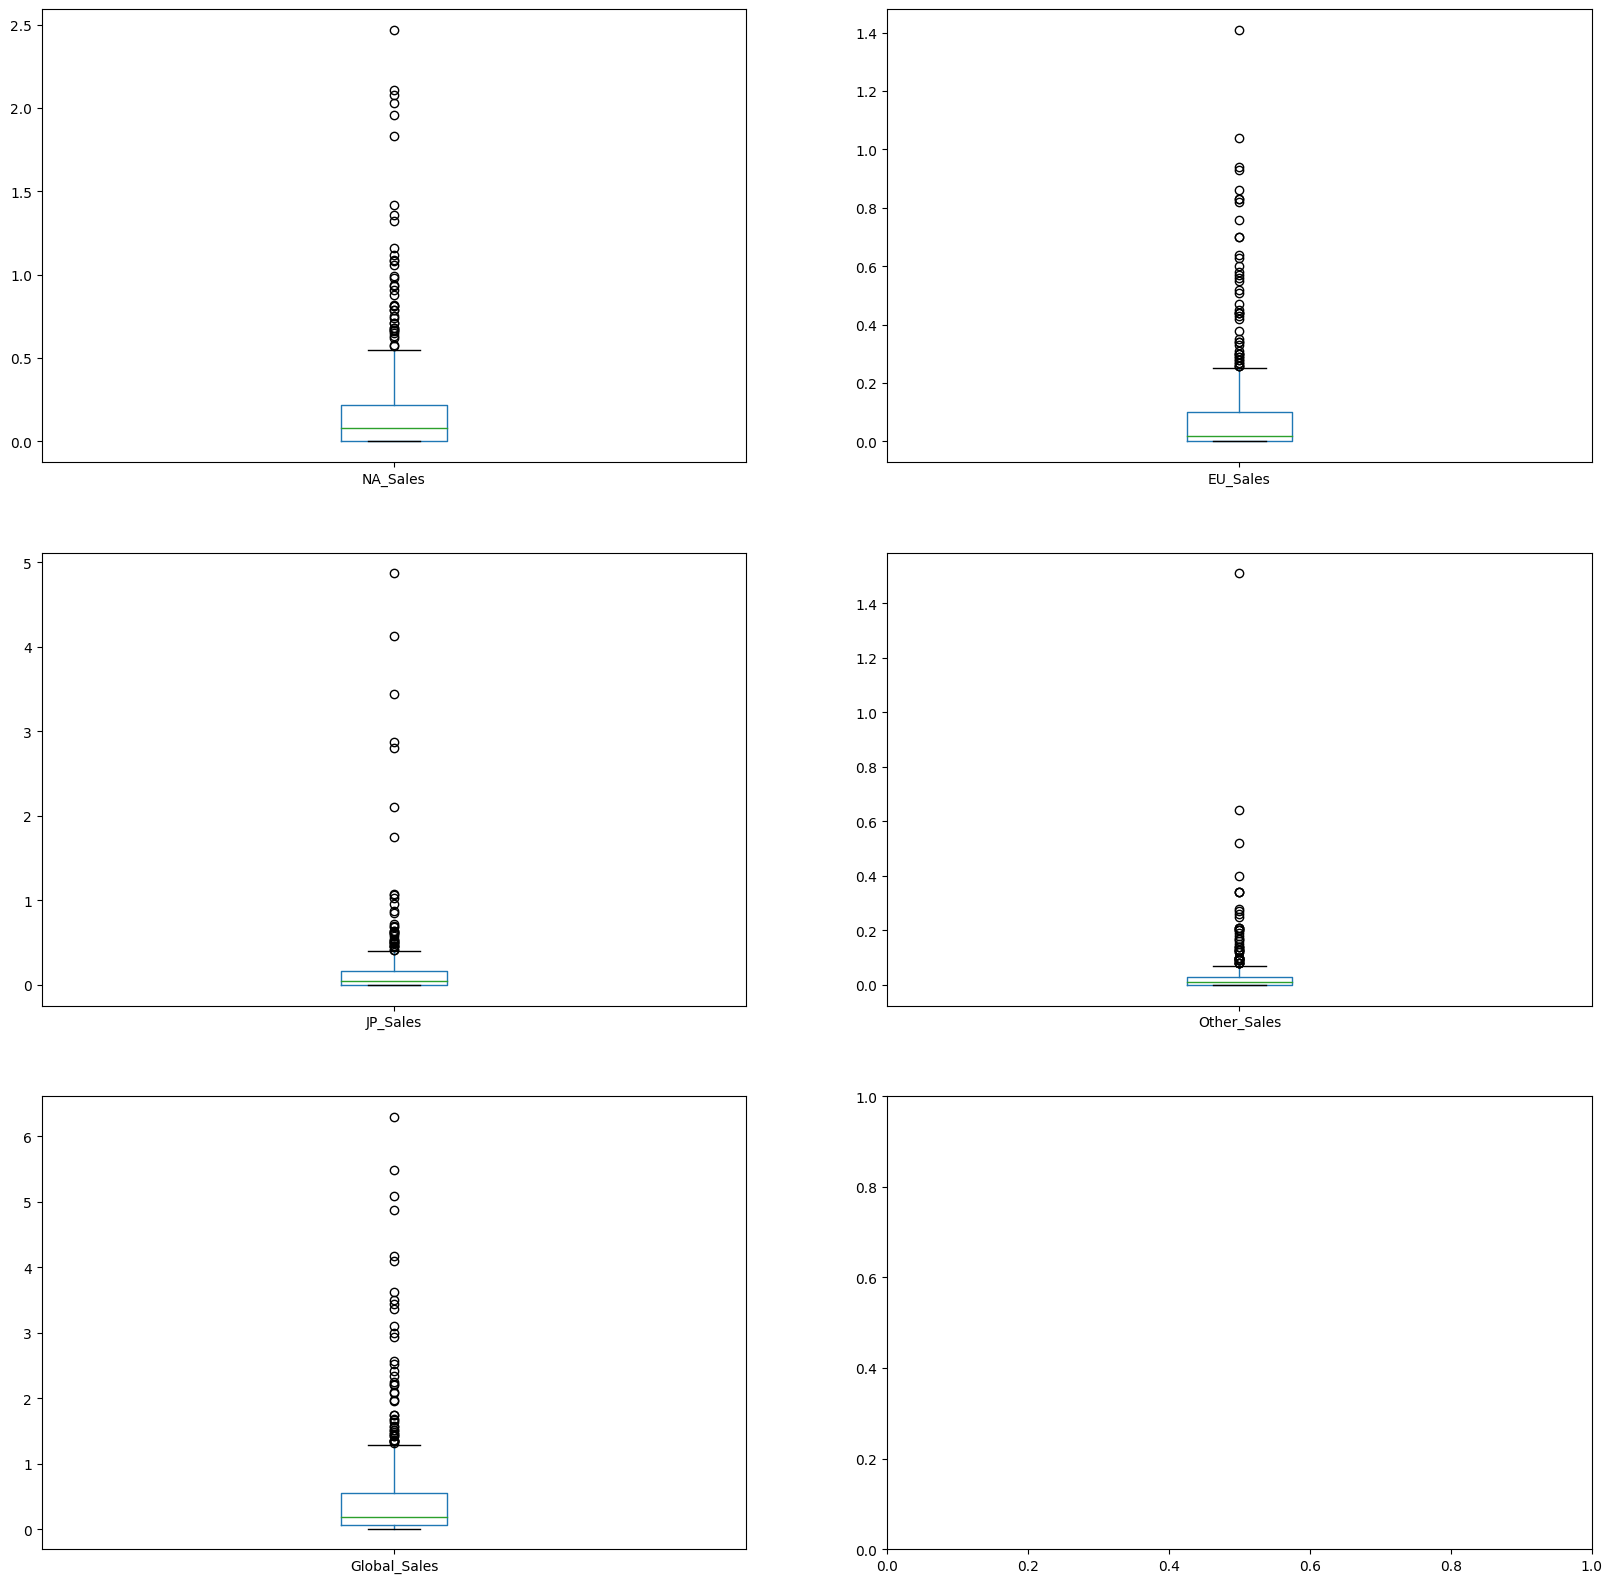

In [ ]:
# CREATE BOXPLOT FOR THOSE COLUMNS

df_boxplot = df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].copy()

fig,axes = plt.subplots(nrows=3, ncols=2,figsize=(20,20))

for i,el in enumerate(df_boxplot.columns):
   a = df.boxplot (el, ax=axes.flatten()[i], grid=False )
plt.show()

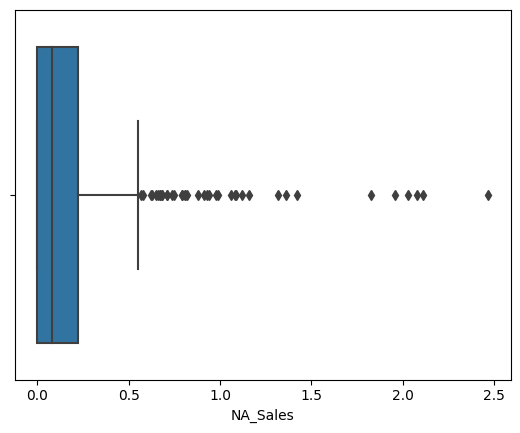

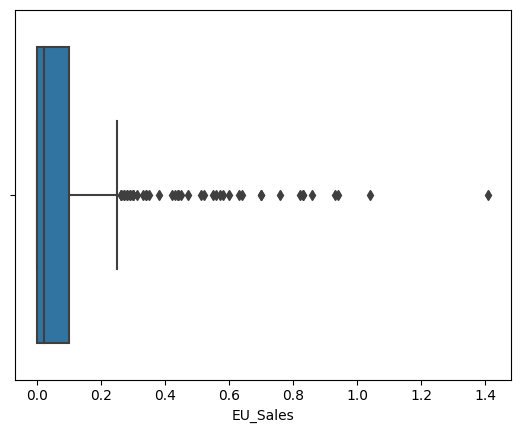

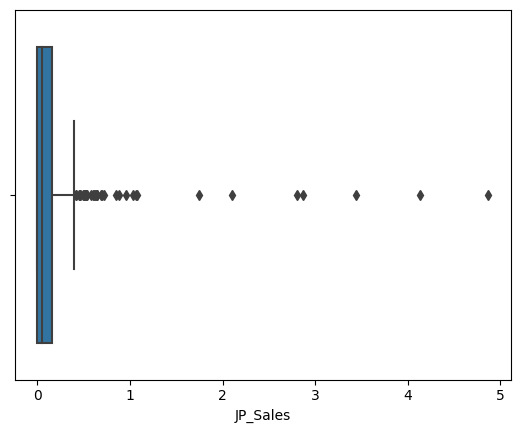

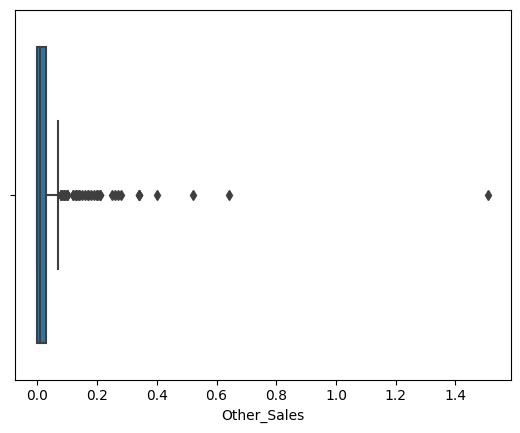

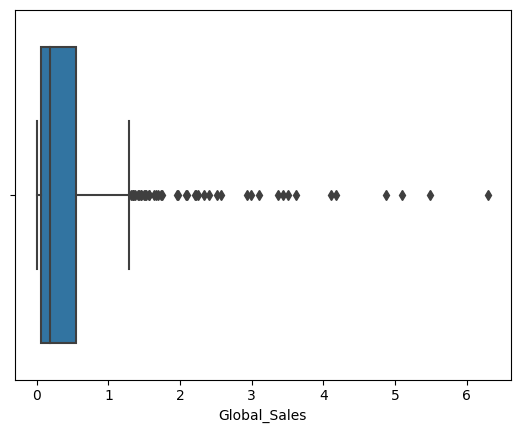

In [ ]:
#Checking the data distribution
numeric_cols = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for col in numeric_cols:
    sns.boxplot(data= df, x=col)
    plt.show()

In [ ]:
#Check the Q1,Q3,IQR,UB & LB

#na = NA_Saless
Q1_na = df['NA_Sales'].quantile(.25)
Q3_na = df['NA_Sales'].quantile(.75)

# IQR
IQR_na = Q3_na - Q1_na
LB_na = Q1_na - 1.5 * IQR_na
UB_na = Q3_na + 1.5 * IQR_na
print('Q1:\n',Q1_na)
print('\nQ3:\n',Q3_na)
print('\nIQR:\n',IQR_na)
print('\nMin:\n',LB_na)
print('\nMax:\n',UB_na)

Q1:
 0.0

Q3:
 0.22

IQR:
 0.22

Min:
 -0.33

Max:
 0.55


In [ ]:
#Check the Q1,Q3,IQR,UB & LB

#eu = EU_Sales
Q1_eu = df['EU_Sales'].quantile(.25)
Q3_eu = df['EU_Sales'].quantile(.75)

# IQR
IQR_eu = Q3_eu - Q1_eu
LB_eu = Q1_eu - 1.5 * IQR_eu
UB_eu = Q3_eu + 1.5 * IQR_eu
print('Q1:\n',Q1_eu)
print('\nQ3:\n',Q3_eu)
print('\nIQR:\n',IQR_eu)
print('\nMin:\n',LB_eu)
print('\nMax:\n',UB_eu)

Q1:
 0.0

Q3:
 0.1

IQR:
 0.1

Min:
 -0.15000000000000002

Max:
 0.25


In [ ]:
#Check the Q1,Q3,IQR,UB & LB

#jp = JP_Sales
Q1_jp = df['JP_Sales'].quantile(.25)
Q3_jp = df['JP_Sales'].quantile(.75)

# IQR
IQR_jp = Q3_jp - Q1_jp
LB_jp = Q1_jp - 1.5 * IQR_jp
UB_jp = Q3_jp + 1.5 * IQR_jp
print('Q1:\n',Q1_jp)
print('\nQ3:\n',Q3_jp)
print('\nIQR:\n',IQR_jp)
print('\nMin:\n',LB_jp)
print('\nMax:\n',UB_jp)

Q1:
 0.0

Q3:
 0.16

IQR:
 0.16

Min:
 -0.24

Max:
 0.4


In [ ]:
#Check the Q1,Q3,IQR,UB & LB

#ot = Other_Sales
Q1_ot = df['Other_Sales'].quantile(.25)
Q3_ot = df['Other_Sales'].quantile(.75)

# IQR
IQR_ot = Q3_ot - Q1_ot
LB_ot = Q1_ot - 1.5 * IQR_ot
UB_ot = Q3_ot + 1.5 * IQR_ot
print('Q1:\n',Q1_ot)
print('\nQ3:\n',Q3_ot)
print('\nIQR:\n',IQR_ot)
print('\nMin:\n',LB_ot)
print('\nMax:\n',UB_ot)

Q1:
 0.0

Q3:
 0.03

IQR:
 0.03

Min:
 -0.045

Max:
 0.075


In [ ]:
#Check the Q1,Q3,IQR,UB & LB

#gs = Global_Sales
Q1_gs = df['Global_Sales'].quantile(.25)
Q3_gs = df['Global_Sales'].quantile(.75)

# IQR
IQR_gs = Q3_gs - Q1_gs
LB_gs = Q1_gs - 1.5 * IQR_gs
UB_gs = Q3_gs + 1.5 * IQR_gs
print('Q1:\n',Q1_gs)
print('\nQ3:\n',Q3_gs)
print('\nIQR:\n',IQR_gs)
print('\nMin:\n',LB_gs)
print('\nMax:\n',UB_gs)


Q1:
 0.065

Q3:
 0.555

IQR:
 0.49000000000000005

Min:
 -0.6700000000000002

Max:
 1.29


we dont remove the outliers because every data sales is important 

##GROUPING PLATFORM

In [ ]:
platforms = {"Playstation" : ["PS", "PS2", "PS3", "PS4"],
             "Xbox" : ["XB", "X360", "XOne"], 
             "PC" : ["PC"],
             "Nintendo" : ["Wii", "WiiU"],
             "Portable" : ["GB", "GBA", "GC", "DS", "3DS", "PSP", "PSV"]}

In [ ]:
def visual_chart(column, palette="Set2"):
    values = column.value_counts().values
    labels = column.value_counts().index
    plt.pie(values, colors=sns.color_palette(palette), 
            labels=labels, autopct="%1.1f%%", 
            startangle=90, pctdistance=0.85)
    
    #draw circle
    centre_circle = plt.Circle((0,0), 0.70, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

In [ ]:
def get_group_label(x, groups=None):
    if groups is None:
        return "Other"
    else:
        for key, val in groups.items():
            if x in val:
                return key
        return "Other"

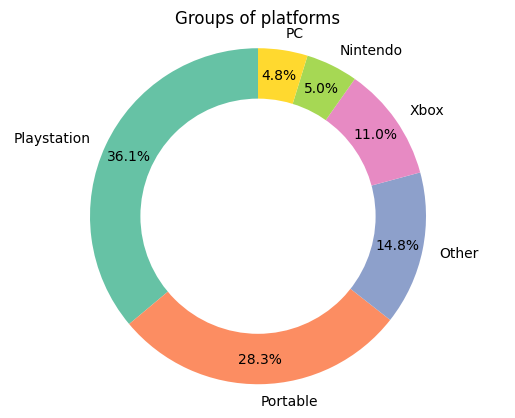

In [ ]:
df["Grouped_Platform"] = df["Platform"].apply(lambda x: get_group_label(x, groups=platforms))
visual_chart(df["Grouped_Platform"])
plt.title("Groups of platforms")
plt.axis("equal");

# EDA

## Statistic Descriptive

In [ ]:
# change 0 value to nan to prevent 0 being count when finding out statistic description

df.replace(0,np.nan,inplace=True)

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating',
       'Grouped_Platform'],
      dtype='object')

In [ ]:
# Numerical columns

df[['Year_of_Release','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,399.000000,275.000000,253.000000,262.000000,226.000000,399.000000,222.000000,222.000000,209.000000,209.000000
mean,2006.353383,0.285964,0.152925,0.262176,0.064602,0.503559,71.603604,33.135135,7.366507,142.172249
std,6.512295,0.384470,0.210593,0.543723,0.127927,0.844589,11.258203,18.203220,1.404296,254.900639
min,1985.000000,0.010000,0.010000,0.010000,0.010000,0.010000,38.000000,4.000000,2.000000,4.000000
25%,2003.000000,0.070000,0.030000,0.050000,0.010000,0.065000,64.250000,20.000000,6.500000,17.000000
50%,2007.000000,0.140000,0.070000,0.120000,0.030000,0.180000,72.500000,30.000000,7.500000,49.000000
75%,2011.000000,0.370000,0.170000,0.267500,0.060000,0.555000,80.000000,42.000000,8.500000,149.000000
max,2016.000000,2.470000,1.410000,4.870000,1.510000,6.300000,96.000000,91.000000,9.700000,1475.000000


insights:
the largest average sales were in North America with an average sales of 0.285964 with the highest sales of 2.47 million copies, Japan had the largest sales among other countries, namely 4.87 million copies but the average sales were below North America and for Global sales have an average sales of 0.503559 with the largest sales of 6.3 million copies.

In [ ]:
# Categorical columns

df[['Name', 'Platform','Genre','Rating']].describe()

,Name,Platform,Genre,Rating
count,399,399,399,231
unique,283,23,12,4
top,Dead Rising 2,PS2,Action,T
freq,5,63,161,86


* There are 399 types of games released by CapCom
* Dead Rising 2 is the most popular game in CapCom
* CapCom released the most games on the PS2 platform with a total of 63 game titles
* Genre Action is the genre most favored by users
* CapCom released the most games rated Teen (T) with 86 game titles

In [ ]:
test = df.groupby(['Genre'],as_index=False).agg({'Name':'count'}).rename(columns={'Name':'Count_games'}).sort_values(by='Count_games', ascending=False)
test

#sepertinya ada yg perlu di selarasin lagi untuk pengunaan syntax di name, ada yg nunique dan count ses

,Genre,Count_games
0,Action,161
2,Fighting,60
4,Platform,46
7,Role-Playing,41
8,Shooter,25
1,Adventure,23
6,Racing,15
3,Misc,12
5,Puzzle,8
10,Sports,3


## Number of Games based on Year Release in every country

In [ ]:
EDA1 = df.groupby(['Year_of_Release'],as_index=False).agg({'Name':'count'}).rename(columns={'Name':'Count_games'})
EDA1.head(20)

,Year_of_Release,Count_games
0,1985,1
1,1986,3
2,1987,1
3,1988,2
4,1989,1
5,1990,3
6,1991,3
7,1992,4
8,1993,7
9,1994,1


In [ ]:
grouped = df.groupby('Year_of_Release')['Name'].count()
grouped.head(20)

Year_of_Release
1985     1
1986     3
1987     1
1988     2
1989     1
1990     3
1991     3
1992     4
1993     7
1994     1
1996     3
1997    12
1998     7
1999     2
2000     5
2001    10
2002    20
2003    33
2004    23
2005    25
Name: Name, dtype: int64

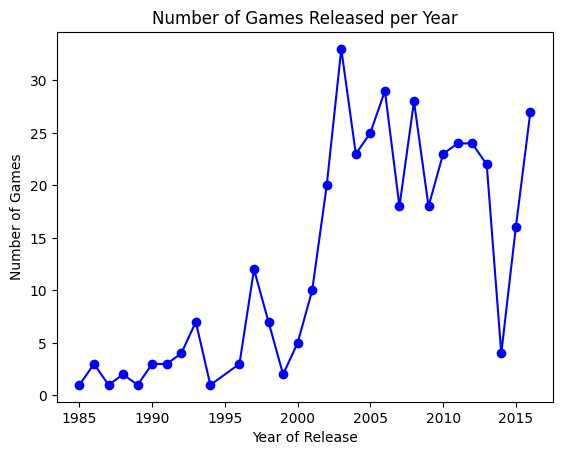

In [ ]:
fig, ax = plt.subplots()

ax.plot(EDA1['Year_of_Release'], EDA1['Count_games'], marker='o', color='blue')

ax.set_title('Number of Games Released per Year')
ax.set_xlabel('Year of Release')
ax.set_ylabel('Number of Games')

plt.show()

From the line chart we can get the insight that at the beginning of the formation of this game it was very unstable at the beginning of its formation it began to increase by releasing more games each year where the peak was in 2003 Capcom released 30 types of games and after that it experienced a decline over time

##Total Sales based on Genre

In [ ]:
EDA2 = df.groupby(['Genre'],as_index=False).agg({'Name':'nunique','NA_Sales':'sum', 'EU_Sales':'sum', 'JP_Sales':'sum', 'Other_Sales':'sum','Global_Sales':'sum'}).rename(columns={'Name':'Count_games'}).sort_values(by='Global_Sales', ascending=False)
EDA2

,Genre,Count_games,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,104,36.04,20.06,22.69,6.47,85.40
2,Fighting,43,14.63,6.73,9.40,2.19,32.98
7,Role-Playing,33,4.30,2.27,23.52,2.56,32.65
4,Platform,38,11.94,3.81,5.72,1.10,22.56
8,Shooter,13,5.24,2.72,2.12,1.02,11.16
1,Adventure,21,3.37,1.38,4.64,0.49,9.89
6,Racing,8,0.68,1.13,0.06,0.51,2.39
3,Misc,10,1.24,0.37,0.38,0.16,2.18
5,Puzzle,6,0.64,0.09,0.00,0.05,0.81
10,Sports,3,0.25,0.02,0.16,0.02,0.45


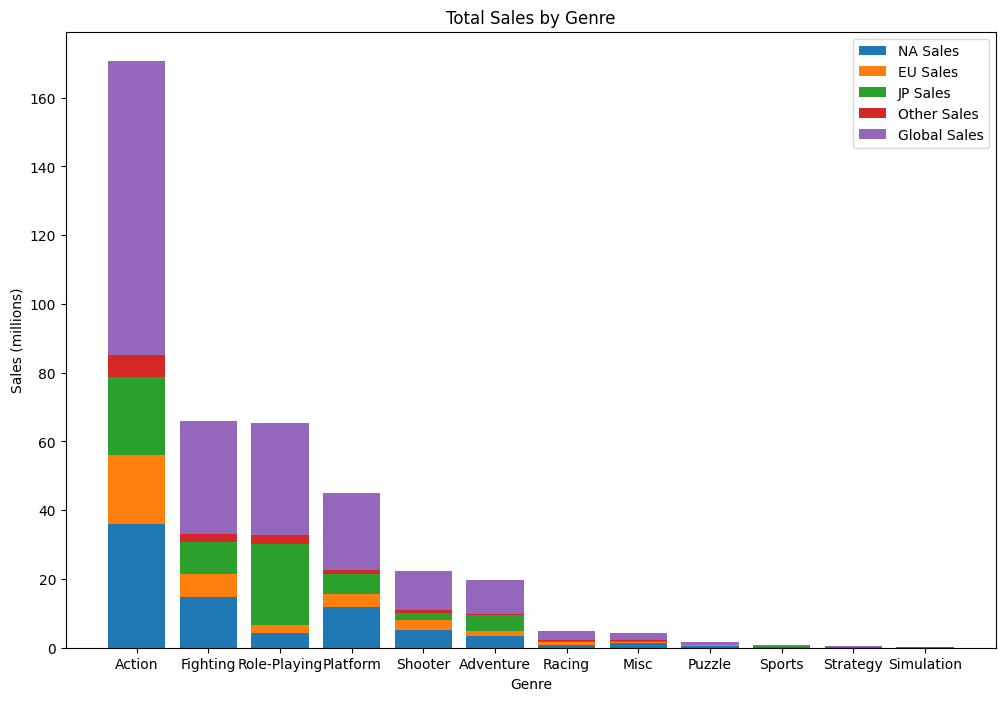

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(EDA2['Genre'], EDA2['NA_Sales'], label='NA Sales')
ax.bar(EDA2['Genre'], EDA2['EU_Sales'], bottom=EDA2['NA_Sales'], label='EU Sales')
ax.bar(EDA2['Genre'], EDA2['JP_Sales'], bottom=EDA2['NA_Sales']+EDA2['EU_Sales'], label='JP Sales')
ax.bar(EDA2['Genre'], EDA2['Other_Sales'], bottom=EDA2['NA_Sales']+EDA2['EU_Sales']+EDA2['JP_Sales'], label='Other Sales')
ax.bar(EDA2['Genre'], EDA2['Global_Sales'], bottom=EDA2['NA_Sales']+EDA2['EU_Sales']+EDA2['JP_Sales']+EDA2['Other_Sales'], label='Global Sales')

ax.set_title('Total Sales by Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Sales (millions)')

ax.legend()

plt.show()

Capcom highest selling company comes from the action game genre.



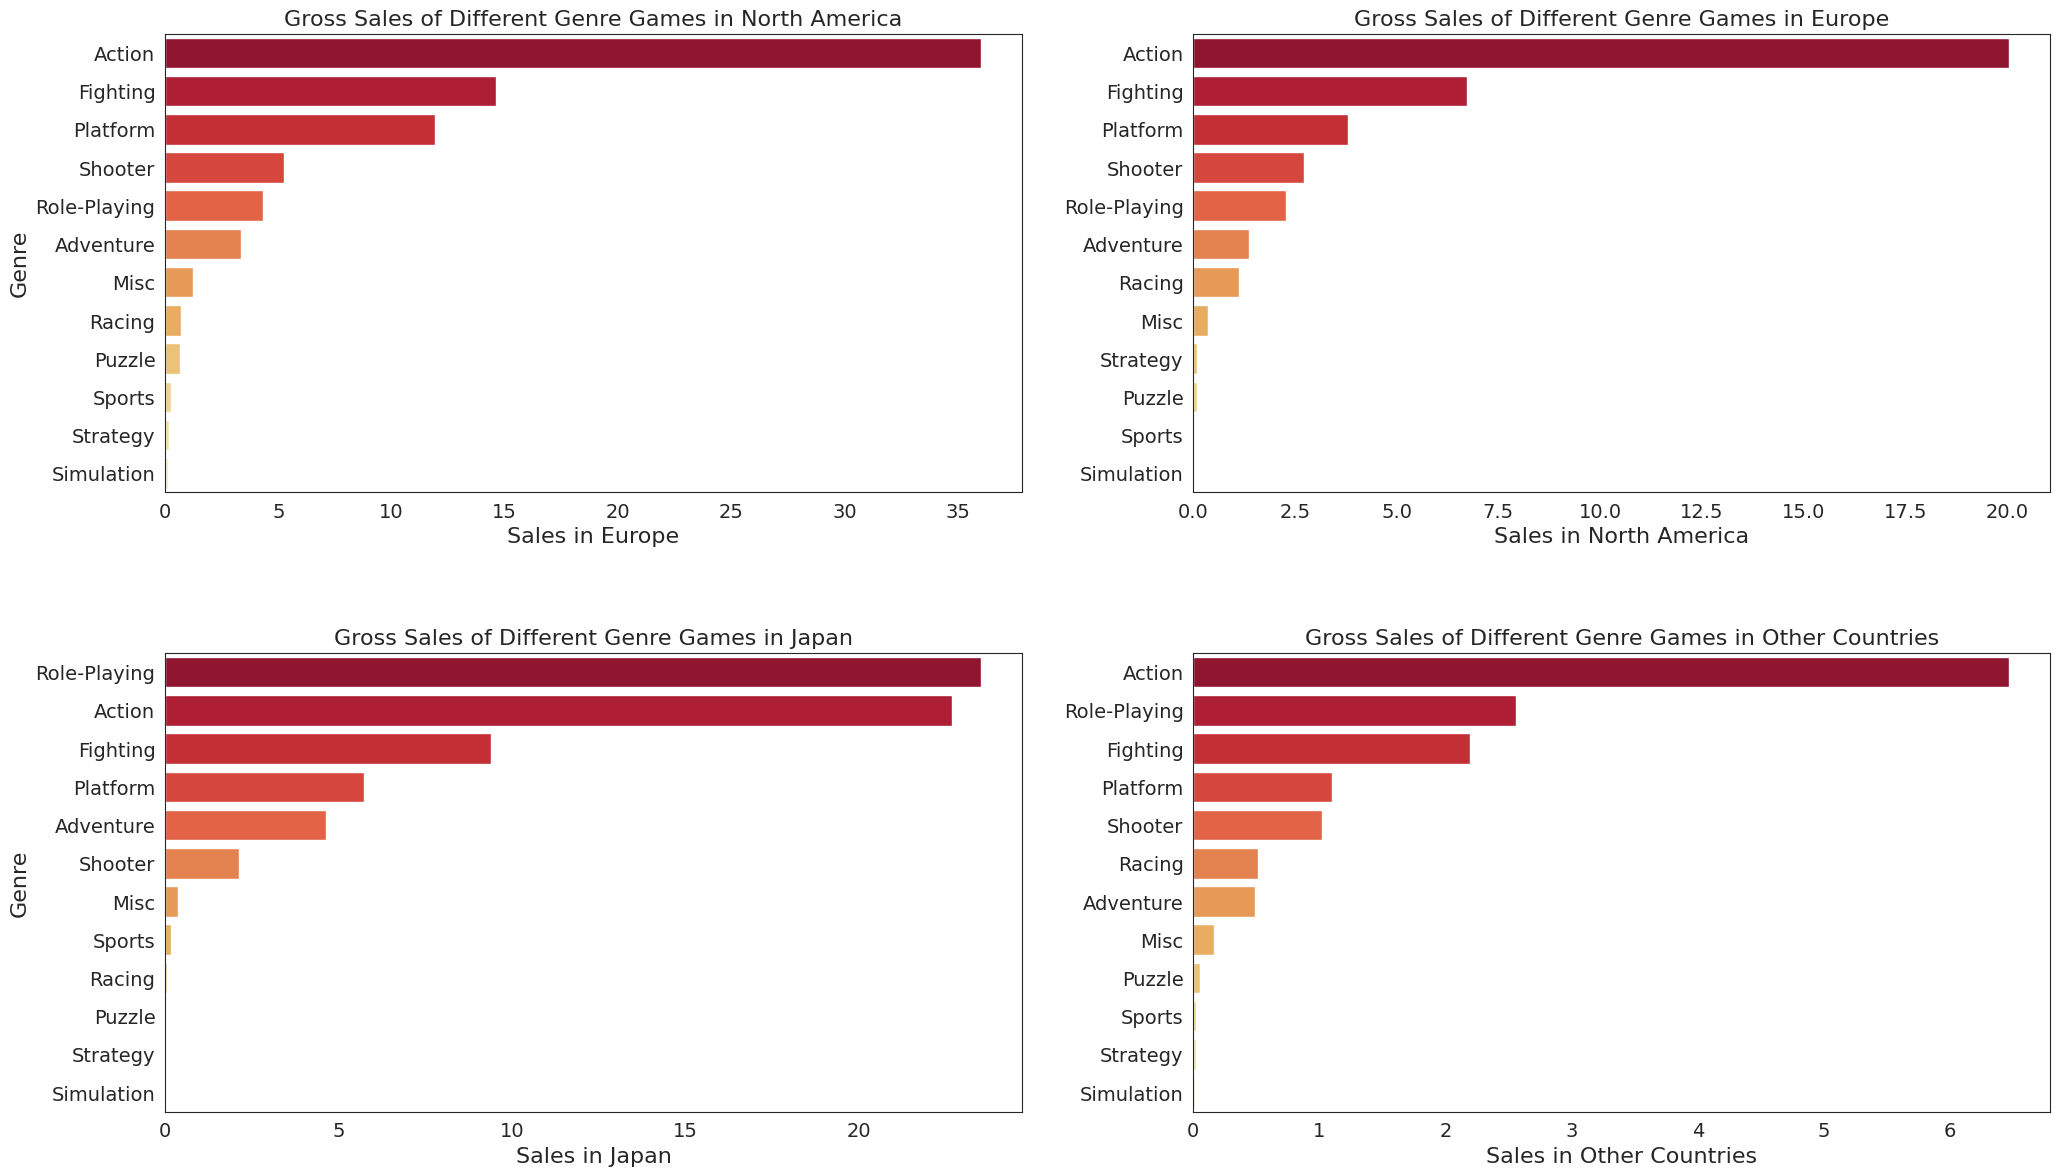

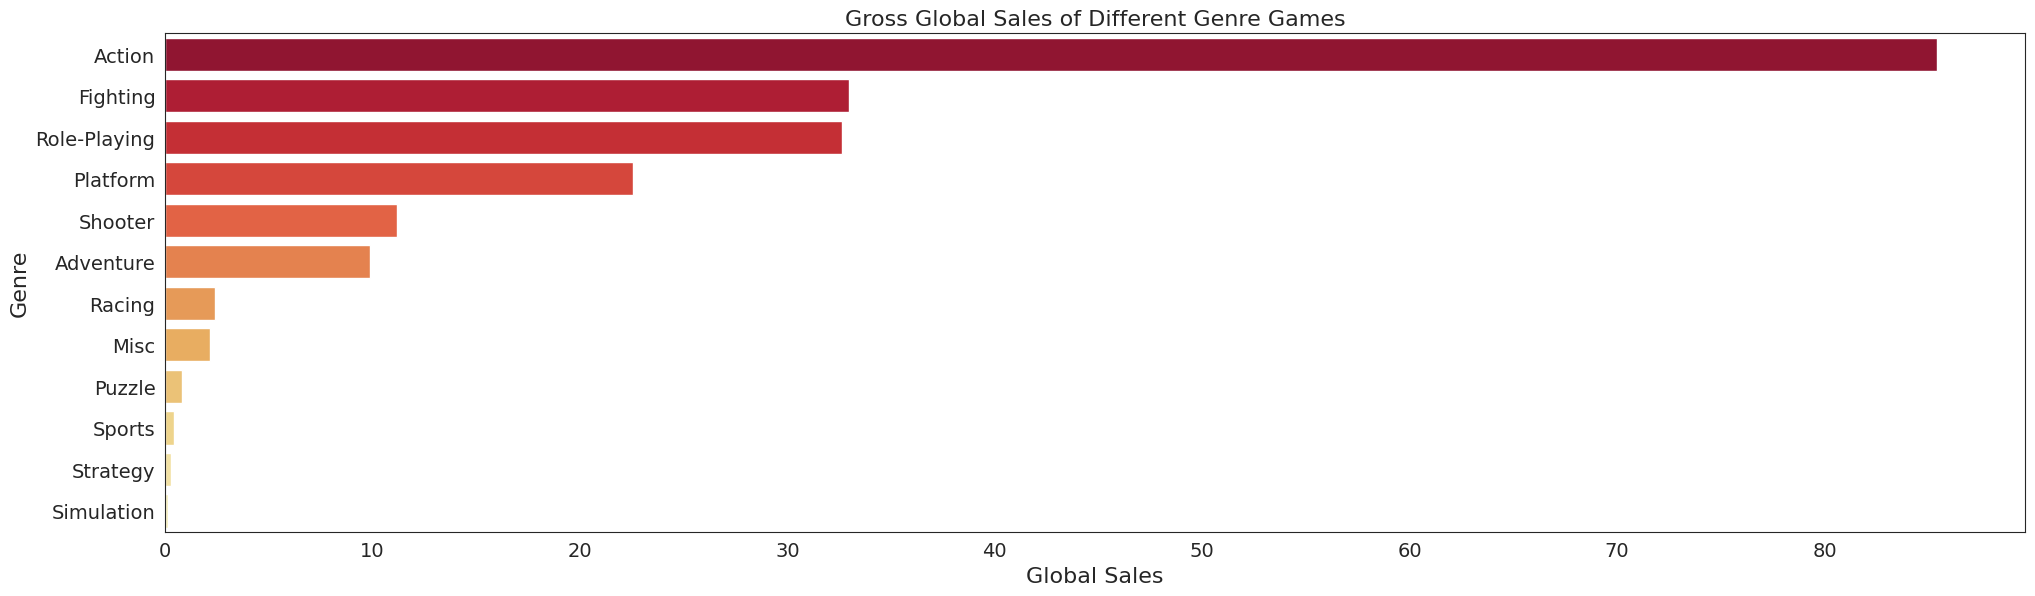

In [ ]:
# Graph 
fig=plt.figure(figsize=(29,14))
plt.subplots_adjust(left=0.25, wspace=0.20, hspace=0.35)
sns.set_style("white")

plt.subplot(2, 2, 1)
plt.title('Gross Sales of Different Genre Games in North America',fontdict={'fontsize':16})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.barplot(y='Genre', x='NA_Sales', data=EDA2.sort_values('NA_Sales',ascending=False),palette='YlOrRd_r');
plt.ylabel('Genre',fontdict={'fontsize':16})
plt.xlabel('Sales in Europe',fontdict={'fontsize':16})

plt.subplot(2, 2, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Sales of Different Genre Games in Europe',fontdict={'fontsize':16})
sns.barplot(y='Genre', x='EU_Sales', data=EDA2.sort_values('EU_Sales',ascending=False),palette='YlOrRd_r');
plt.ylabel('',fontdict={'fontsize':16})
plt.xlabel('Sales in North America',fontdict={'fontsize':16})

plt.subplot(2, 2, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Sales of Different Genre Games in Japan',fontdict={'fontsize':16})
sns.barplot(y='Genre', x='JP_Sales', data=EDA2.sort_values('JP_Sales',ascending=False),palette='YlOrRd_r');
plt.ylabel('Genre',fontdict={'fontsize':16})
plt.xlabel('Sales in Japan',fontdict={'fontsize':16})


plt.subplot(2, 2, 4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Sales of Different Genre Games in Other Countries',fontdict={'fontsize':16})
sns.barplot(y='Genre', x='Other_Sales', data=EDA2.sort_values('Other_Sales',ascending=False),palette='YlOrRd_r');
plt.ylabel('',fontdict={'fontsize':16})
plt.xlabel('Sales in Other Countries',fontdict={'fontsize':16})

fig=plt.figure(figsize=(24,22))
plt.subplot2grid((3,1), (1,0))
sns.set_style("white")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Global Sales of Different Genre Games',fontdict={'fontsize':16})
sns.barplot(y='Genre', x='Global_Sales', data=EDA2.sort_values('Global_Sales',ascending=False),palette='YlOrRd_r');
plt.ylabel('Genre',fontdict={'fontsize':16})
plt.xlabel('Global Sales',fontdict={'fontsize':16});

insights:
The game genre that sells the most in North America, Europe, Other, and Global is the action game genre, this is different from Japan where the best selling seller is the Role-Playing genre. If you look at the trend, the tastes of users both in North America and Europe are similar because the average sales per genre are almost the same. This also happens in Japan with Other which has almost the same trends.

##Total Sales based on Platform 

In [ ]:
EDA3 = df.groupby(['Grouped_Platform'],as_index=False).agg({'Name':'nunique','NA_Sales':'sum', 'EU_Sales':'sum', 'JP_Sales':'sum', 'Other_Sales':'sum','Global_Sales':'sum'}).rename(columns={'Name':'Count_games'}).sort_values(by='Global_Sales', ascending=False)
EDA3

,Grouped_Platform,Count_games,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3,Playstation,133,28.95,21.15,19.88,7.83,77.87
4,Portable,112,14.53,4.75,30.88,1.75,52.06
1,Other,58,16.99,4.47,14.93,2.31,38.72
5,Xbox,39,13.52,5.92,1.36,1.95,22.78
0,Nintendo,20,4.41,1.90,1.64,0.69,8.63
2,PC,19,0.24,0.50,0.00,0.07,0.86


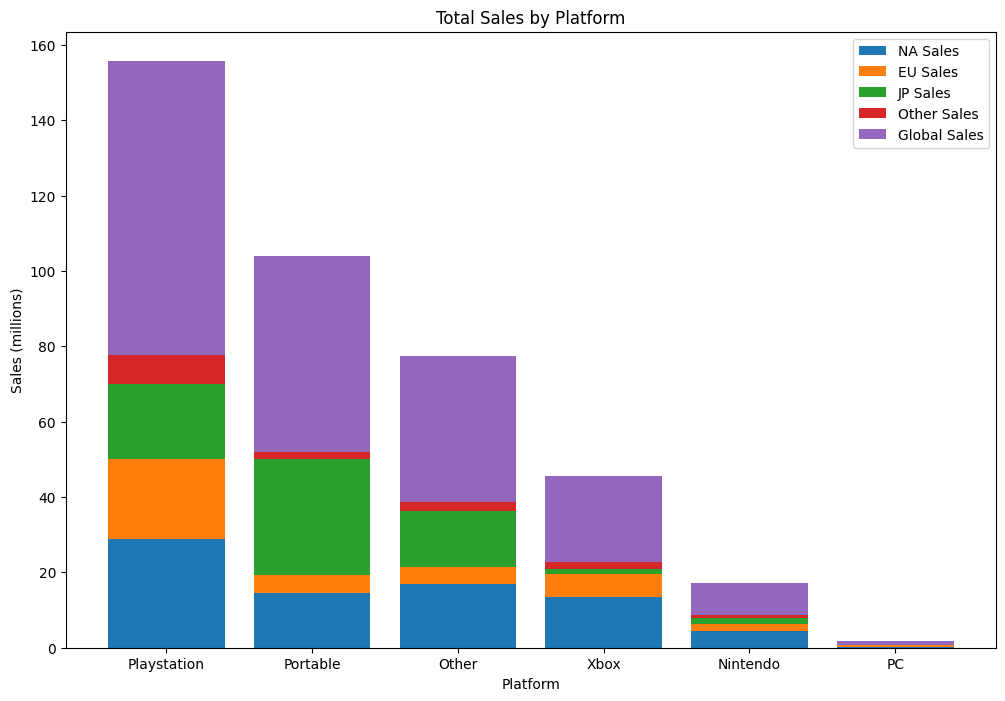

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(EDA3['Grouped_Platform'], EDA3['NA_Sales'], label='NA Sales')
ax.bar(EDA3['Grouped_Platform'], EDA3['EU_Sales'], bottom=EDA3['NA_Sales'], label='EU Sales')
ax.bar(EDA3['Grouped_Platform'], EDA3['JP_Sales'], bottom=EDA3['NA_Sales']+EDA3['EU_Sales'], label='JP Sales')
ax.bar(EDA3['Grouped_Platform'], EDA3['Other_Sales'], bottom=EDA3['NA_Sales']+EDA3['EU_Sales']+EDA3['JP_Sales'], label='Other Sales')
ax.bar(EDA3['Grouped_Platform'], EDA3['Global_Sales'], bottom=EDA3['NA_Sales']+EDA3['EU_Sales']+EDA3['JP_Sales']+EDA3['Other_Sales'], label='Global Sales')

ax.set_title('Total Sales by Platform')
ax.set_xlabel('Platform')
ax.set_ylabel('Sales (millions)')

ax.legend()

plt.show()

Text(0.5, 0, 'Global Sales')

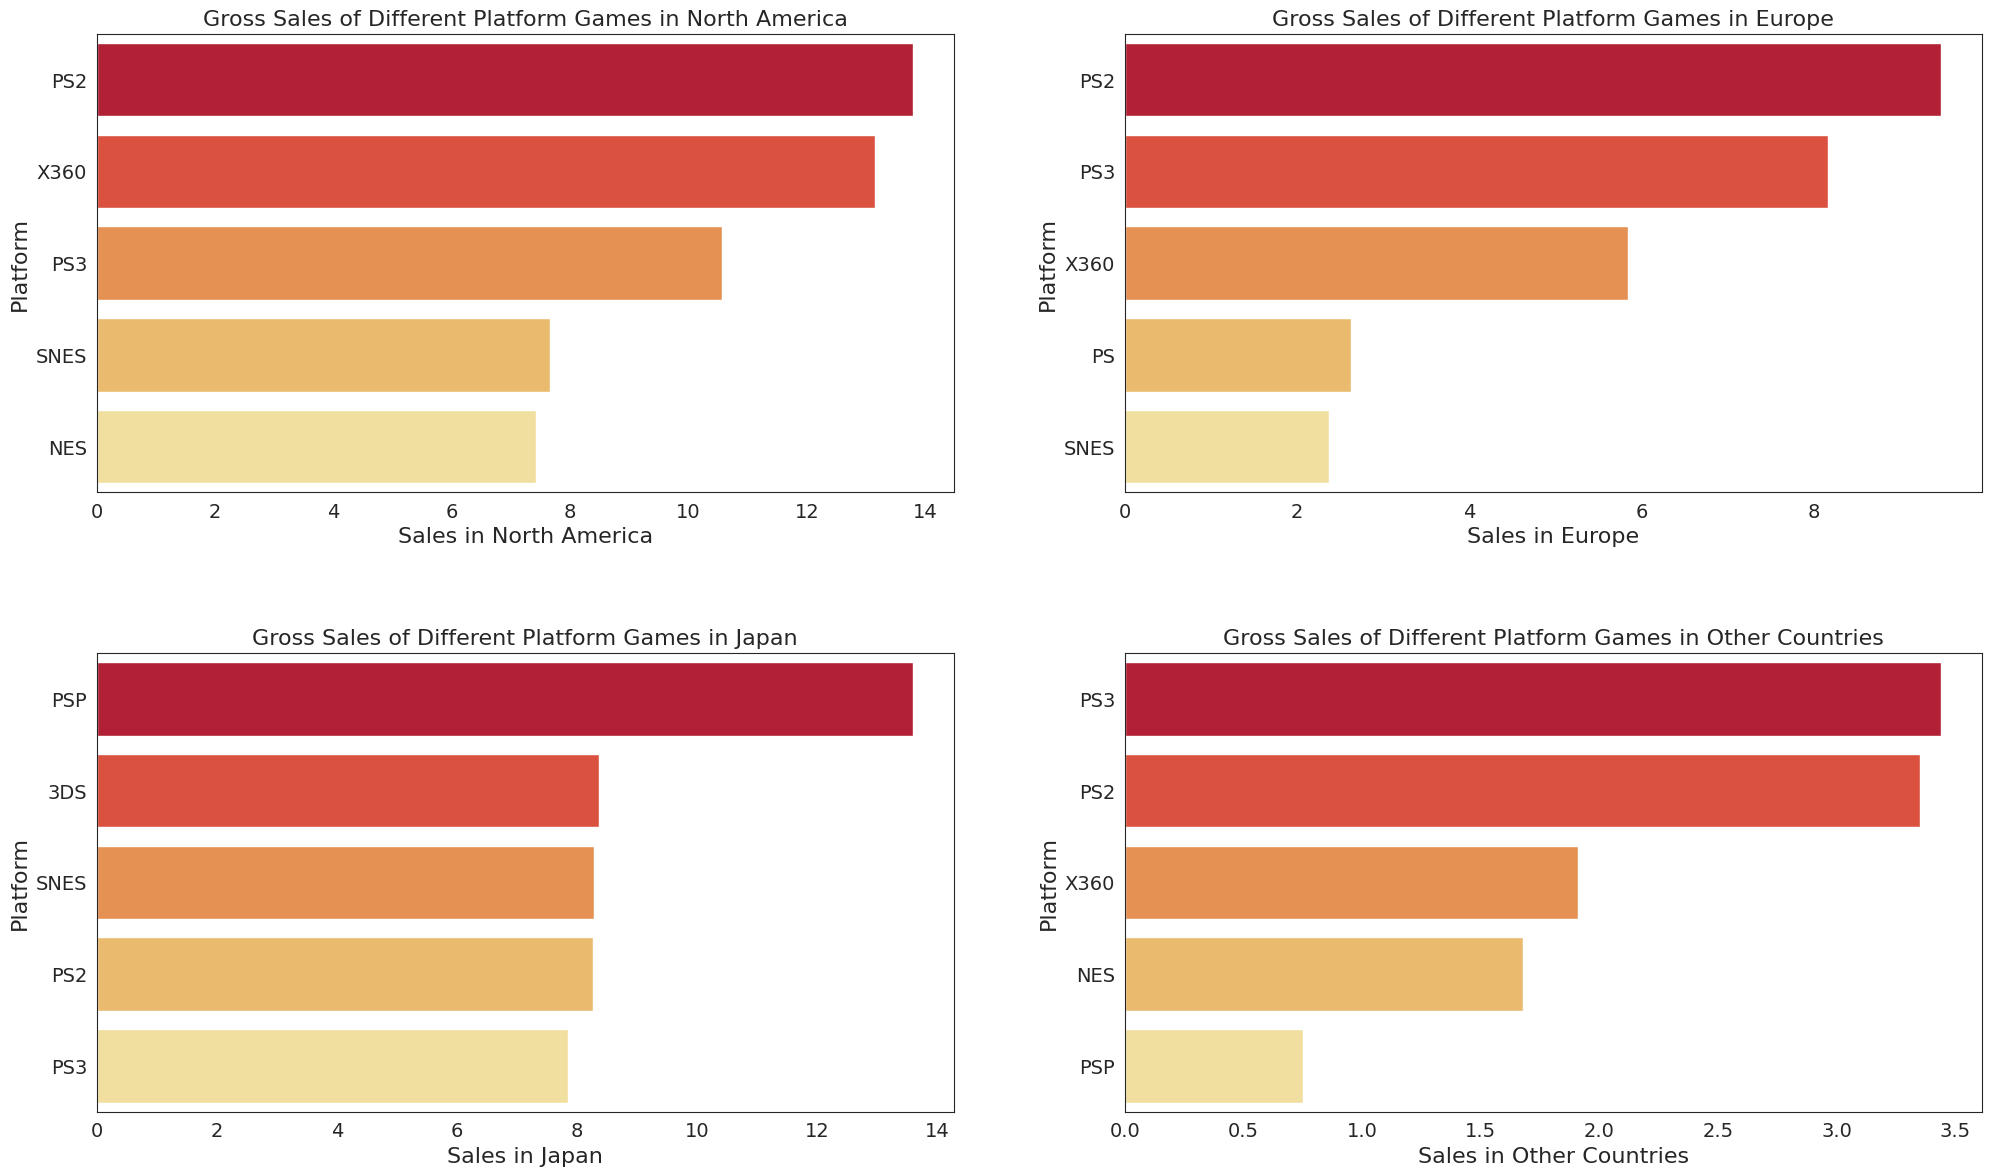

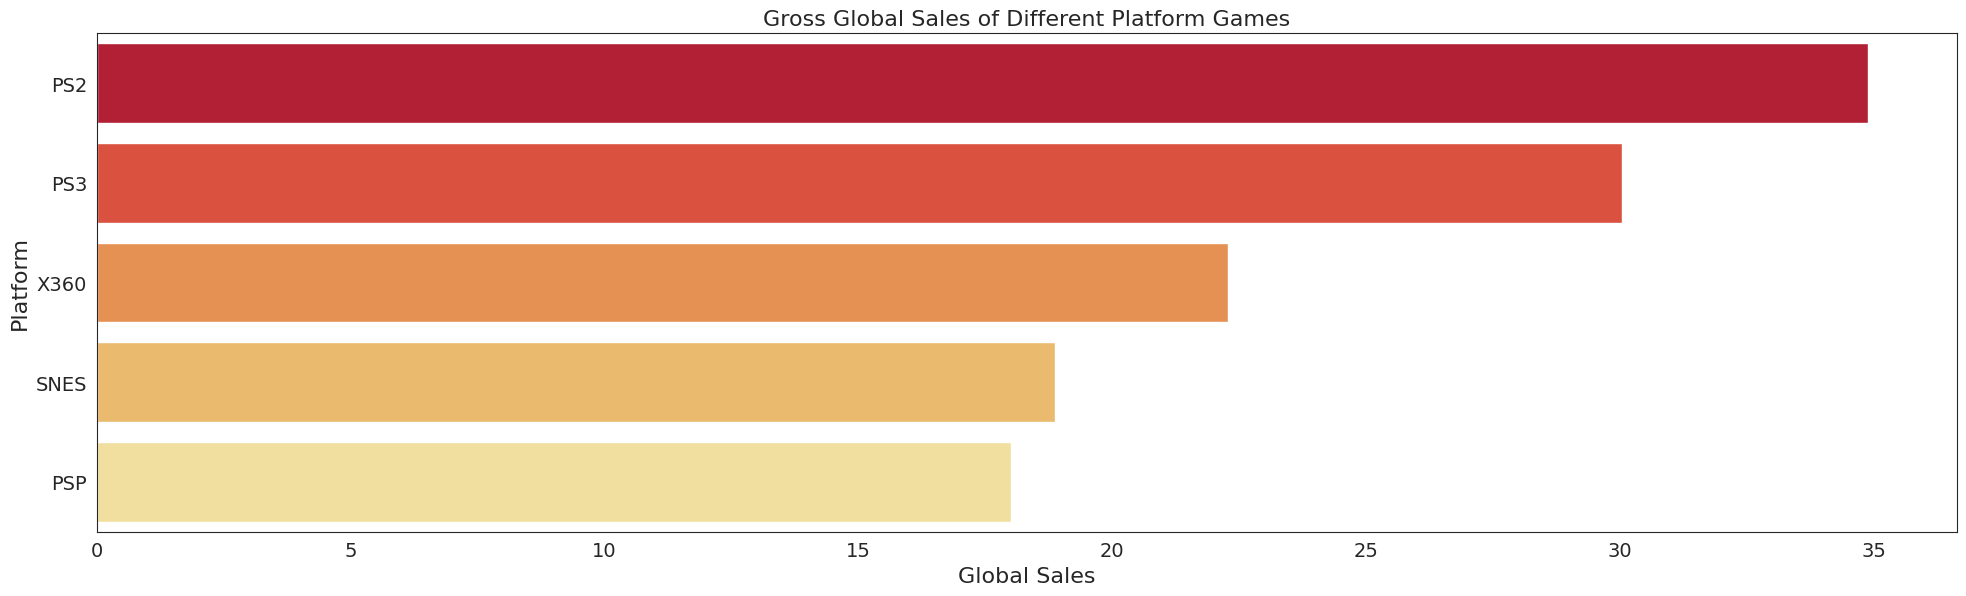

In [ ]:
fig=plt.figure(figsize=(29,14))
plt.subplots_adjust(left=0.25, wspace=0.20, hspace=0.35)
sns.set_style("white")

plt.subplot(2, 2, 1)
plt.title('Gross Sales of Different Platform Games in North America',fontdict={'fontsize':16})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.barplot(y='Platform', x='NA_Sales', data=EDA3.sort_values('NA_Sales',ascending=False)[:5],palette='YlOrRd_r');
plt.ylabel('Platform',fontdict={'fontsize':16})
plt.xlabel('Sales in North America',fontdict={'fontsize':16})

plt.subplot(2, 2, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Sales of Different Platform Games in Europe',fontdict={'fontsize':16})
sns.barplot(y='Platform', x='EU_Sales', data=EDA3.sort_values('EU_Sales',ascending=False)[:5],palette='YlOrRd_r');
plt.ylabel('Platform',fontdict={'fontsize':16})
plt.xlabel('Sales in Europe',fontdict={'fontsize':16})

plt.subplot(2, 2, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Sales of Different Platform Games in Japan',fontdict={'fontsize':16})
sns.barplot(y='Platform', x='JP_Sales', data=EDA3.sort_values('JP_Sales',ascending=False)[:5],palette='YlOrRd_r');
plt.ylabel('Platform',fontdict={'fontsize':16})
plt.xlabel('Sales in Japan',fontdict={'fontsize':16})

plt.subplot(2, 2, 4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Sales of Different Platform Games in Other Countries',fontdict={'fontsize':16})
sns.barplot(y='Platform', x='Other_Sales', data=EDA3.sort_values('Other_Sales',ascending=False)[:5],palette='YlOrRd_r');
plt.ylabel('Platform',fontdict={'fontsize':16})
plt.xlabel('Sales in Other Countries',fontdict={'fontsize':16})

fig=plt.figure(figsize=(24,22))
plt.subplot2grid((3,1), (1,0))
sns.set_style("white")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Global Sales of Different Platform Games',fontdict={'fontsize':16})
sns.barplot(y='Platform', x='Global_Sales', data=EDA3.sort_values('Global_Sales',ascending=False)[:5],palette='YlOrRd_r');
plt.ylabel('Platform',fontdict={'fontsize':16})
plt.xlabel('Global Sales',fontdict={'fontsize':16})


insights:
In Europe and other countries, there is a trend in common where the platforms favored by its users have similarities, namely the first place is occupied by the PS2, the second place is occupied by the PS3 and the third place is occupied by the X360. In North America, the most popular platform game is X360, followed by PS2 and Wii. Meanwhile, in Japan, the popular gaming platform is the DS. PS, and PS2. For the Global market, the most popular game platforms are PS2, X360 and PS3.

##Total Sales based on Year of Release

In [ ]:
EDA4 = df.groupby(['Year_of_Release'],as_index=False).agg({'NA_Sales':'sum', 'EU_Sales':'sum', 'JP_Sales':'sum', 'Other_Sales':'sum','Global_Sales':'sum'})
EDA4.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1985,0.65,0.14,0.21,0.00,1.00
1,1986,1.94,0.42,1.38,1.57,5.30
2,1987,0.45,0.08,0.27,0.01,0.81
3,1988,1.75,0.38,0.77,0.04,2.94
4,1989,0.91,0.30,0.42,0.04,1.67


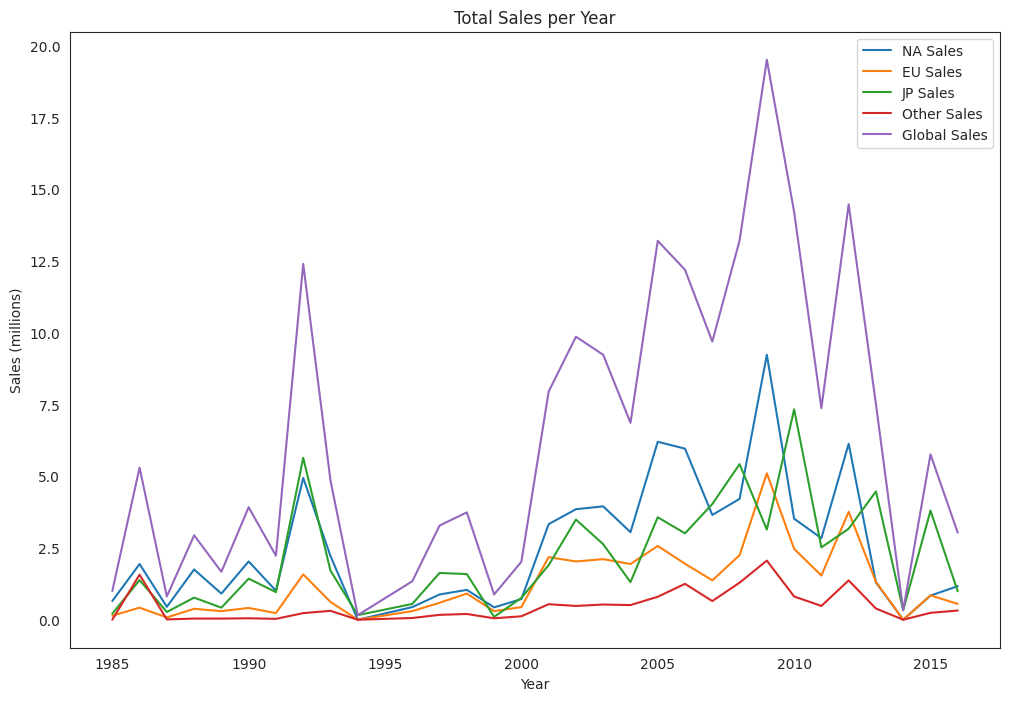

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(EDA4['Year_of_Release'], EDA4['NA_Sales'], label='NA Sales')
ax.plot(EDA4['Year_of_Release'], EDA4['EU_Sales'], label='EU Sales')
ax.plot(EDA4['Year_of_Release'], EDA4['JP_Sales'], label='JP Sales')
ax.plot(EDA4['Year_of_Release'], EDA4['Other_Sales'], label='Other Sales')
ax.plot(EDA4['Year_of_Release'], EDA4['Global_Sales'], label='Global Sales')

ax.set_title('Total Sales per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Sales (millions)')

ax.legend()

plt.show()

We can see from the graph above that in 1995-2000 all countries experienced a decline in sales and experienced an increase from 2000-2014 after that in 2015 sales experienced a drastic decline in all countries

##Name Platform Global Sales

In [ ]:
EDA5 = df.groupby(['Name'],as_index=False).agg({'Platform':'count','Global_Sales':'sum'}).rename(columns={'Platform':'Count_platform'}).sort_values(by='Count_platform', ascending=False)
EDA5.head(20)

,Name,Count_platform,Global_Sales
216,Resident Evil: Revelations 2,5,1.15
203,Resident Evil 6,5,5.25
38,Dead Rising 2,5,3.08
215,Resident Evil: Revelations,5,2.12
46,Devil May Cry 4,4,3.05
255,Street Fighter X Tekken,4,1.52
62,DuckTales: Remastered,4,0.18
57,DmC: Devil May Cry,4,1.68
210,Resident Evil Zero,4,1.78
168,MotoGP 08,4,0.97


Insight : 
There are a number of games released by Capcom that are available on various platforms. As we know games can't only be accessed on 1 platform, based on the data above games are most used on 5 different platforms.

##Rating per Global Sales

In [ ]:
EDA6 = df.groupby(['Rating'],as_index=False).agg({'Global_Sales':'sum','Name':'count'}).rename(columns={'Name':'Count_games'}).sort_values(by='Global_Sales', ascending=False)
EDA6

,Rating,Global_Sales,Count_games
2,M,62.47,85
3,T,43.86,86
0,E,10.87,56
1,E10+,1.15,4


CAPCOM has the highest sales of games with a Mature(M) rating, which is 62.47 million copies.

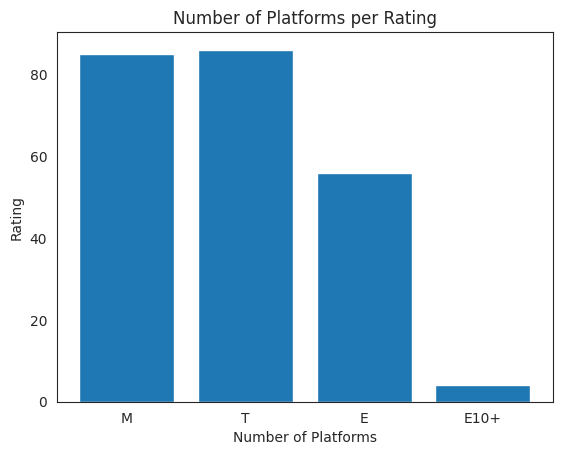

In [ ]:
fig, ax = plt.subplots()

ax.bar(EDA6['Rating'], EDA6['Count_games'])

ax.set_title('Number of Platforms per Rating')
ax.set_xlabel('Number of Platforms')
ax.set_ylabel('Rating')

plt.show()

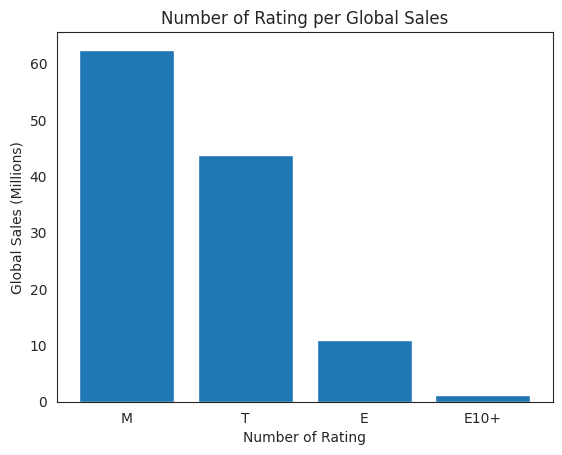

In [ ]:
fig, ax = plt.subplots()

ax.bar(EDA6['Rating'], EDA6['Global_Sales'])

ax.set_title('Number of Rating per Global Sales')
ax.set_xlabel('Number of Rating')
ax.set_ylabel('Global Sales (Millions)')

plt.show()

##Total Platform Based on Genre

In [ ]:
EDA7 = df.groupby(['Genre'],as_index=False).agg({'Platform':'count'}).sort_values(by='Platform', ascending=False)
EDA7

,Genre,Platform
0,Action,161
2,Fighting,60
4,Platform,46
7,Role-Playing,41
8,Shooter,25
1,Adventure,23
6,Racing,15
3,Misc,12
5,Puzzle,8
10,Sports,3


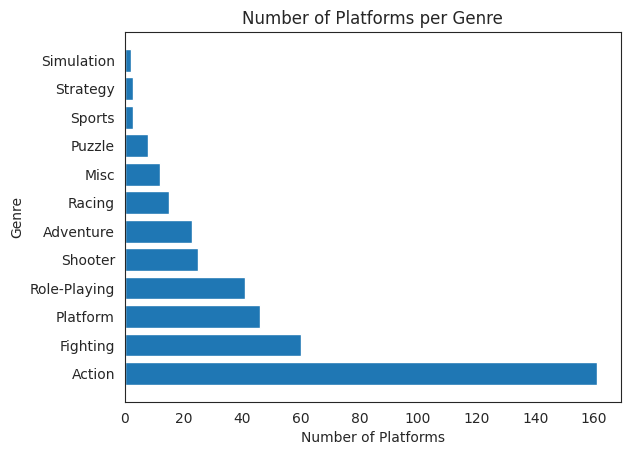

In [ ]:
fig, ax = plt.subplots()

ax.barh(EDA7['Genre'], EDA7['Platform'])

ax.set_title('Number of Platforms per Genre')
ax.set_xlabel('Number of Platforms')
ax.set_ylabel('Genre')

plt.show()

The action genre is the most widely played on various platforms by its users, then in second place is the fighting genre

#CAPCOM GROWTH SALES PER REGION

##GLOBAL GROWTH SALES

In [ ]:
Growth_Sales = df.groupby(['Year_of_Release'], as_index=False).agg({'Global_Sales': 'sum'})

Growth_Sales['Growth'] = Growth_Sales['Global_Sales'].pct_change() * 100
Growth_Sales['Growth'] = Growth_Sales['Growth'].round(2).astype(str) + '%'

print(Growth_Sales)
#Growth_Sales['Growth'] = (Growth_Sales['Global_Sales'].pct_change() * 100).fillna(0)

    Year_of_Release  Global_Sales    Growth
0              1985          1.00      nan%
1              1986          5.30    430.0%
2              1987          0.81   -84.72%
3              1988          2.94   262.96%
4              1989          1.67    -43.2%
5              1990          3.92   134.73%
6              1991          2.23   -43.11%
7              1992         12.40   456.05%
8              1993          4.85   -60.89%
9              1994          0.16    -96.7%
10             1996          1.34    737.5%
11             1997          3.28   144.78%
12             1998          3.74    14.02%
13             1999          0.88   -76.47%
14             2000          2.02   129.55%
15             2001          7.95   293.56%
16             2002          9.86    24.03%
17             2003          9.23    -6.39%
18             2004          6.86   -25.68%
19             2005         13.20    92.42%
20             2006         12.19    -7.65%
21             2007          9.6

<Axes: xlabel='Year_of_Release', ylabel='Global_Sales'>

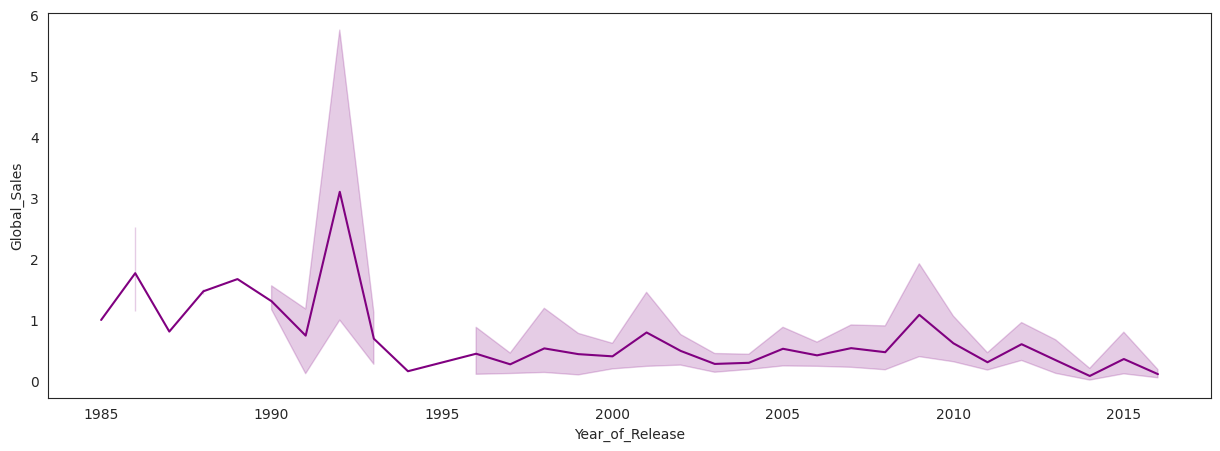

In [ ]:
fig = plt.figure(figsize=(15,5)) #ukuran canvas
sns.lineplot(data=df,x='Year_of_Release',y='Global_Sales', color='purple')

##NA GROWTH SALES

In [ ]:
Growth_Sales = df.groupby(['Year_of_Release'], as_index=False).agg({'NA_Sales': 'sum'})

Growth_Sales['Growth'] = Growth_Sales['NA_Sales'].pct_change() * 100
Growth_Sales['Growth'] = Growth_Sales['Growth'].round(2).astype(str) + '%'

print(Growth_Sales)
#Growth_Sales['Growth'] = (Growth_Sales['NA_Sales'].pct_change() * 100).fillna(0)

    Year_of_Release  NA_Sales   Growth
0              1985      0.65     nan%
1              1986      1.94  198.46%
2              1987      0.45   -76.8%
3              1988      1.75  288.89%
4              1989      0.91   -48.0%
5              1990      2.03  123.08%
6              1991      1.01  -50.25%
7              1992      4.94  389.11%
8              1993      2.22  -55.06%
9              1994      0.00  -100.0%
10             1996      0.44     inf%
11             1997      0.88   100.0%
12             1998      1.04   18.18%
13             1999      0.43  -58.65%
14             2000      0.72   67.44%
15             2001      3.33   362.5%
16             2002      3.85   15.62%
17             2003      3.95     2.6%
18             2004      3.05  -22.78%
19             2005      6.20  103.28%
20             2006      5.96   -3.87%
21             2007      3.65  -38.76%
22             2008      4.21   15.34%
23             2009      9.23  119.24%
24             2010      

<Axes: xlabel='Year_of_Release', ylabel='NA_Sales'>

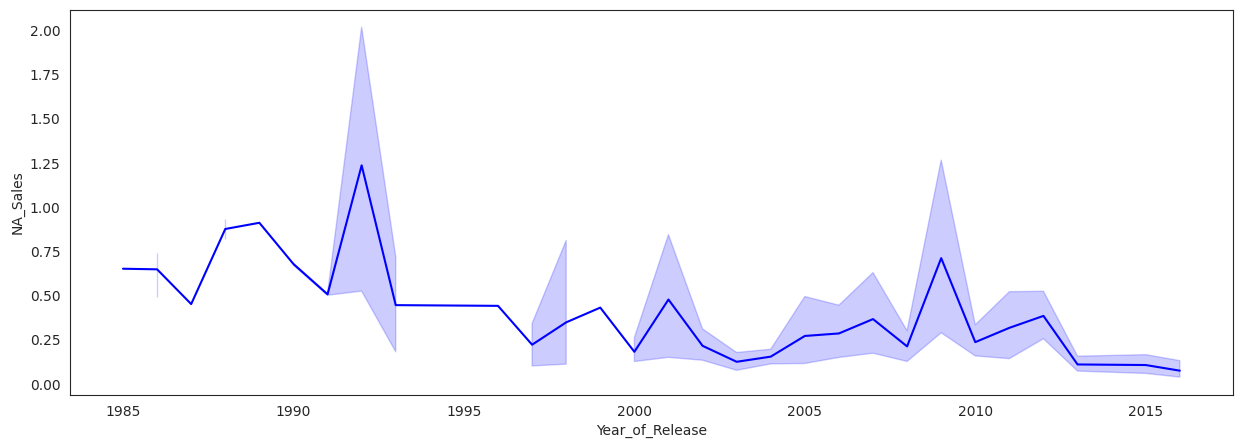

In [ ]:
fig = plt.figure(figsize=(15,5)) #ukuran canvas
sns.lineplot(data=df,x='Year_of_Release',y='NA_Sales', color='blue')

##EU GROWTH SALES

In [ ]:
Growth_Sales = df.groupby(['Year_of_Release'], as_index=False).agg({'EU_Sales': 'sum'})

Growth_Sales['Growth'] = Growth_Sales['EU_Sales'].pct_change() * 100
Growth_Sales['Growth'] = Growth_Sales['Growth'].round(2).astype(str) + '%'

print(Growth_Sales)
#Growth_Sales['Growth'] = (Growth_Sales['EU_Sales'].pct_change() * 100).fillna(0)

    Year_of_Release  EU_Sales   Growth
0              1985      0.14     nan%
1              1986      0.42   200.0%
2              1987      0.08  -80.95%
3              1988      0.38   375.0%
4              1989      0.30  -21.05%
5              1990      0.41   36.67%
6              1991      0.23   -43.9%
7              1992      1.58  586.96%
8              1993      0.62  -60.76%
9              1994      0.00  -100.0%
10             1996      0.30     inf%
11             1997      0.59   96.67%
12             1998      0.91   54.24%
13             1999      0.30  -67.03%
14             2000      0.44   46.67%
15             2001      2.18  395.45%
16             2002      2.03   -6.88%
17             2003      2.11    3.94%
18             2004      1.94   -8.06%
19             2005      2.57   32.47%
20             2006      1.95  -24.12%
21             2007      1.37  -29.74%
22             2008      2.25   64.23%
23             2009      5.10  126.67%
24             2010      

<Axes: xlabel='Year_of_Release', ylabel='EU_Sales'>

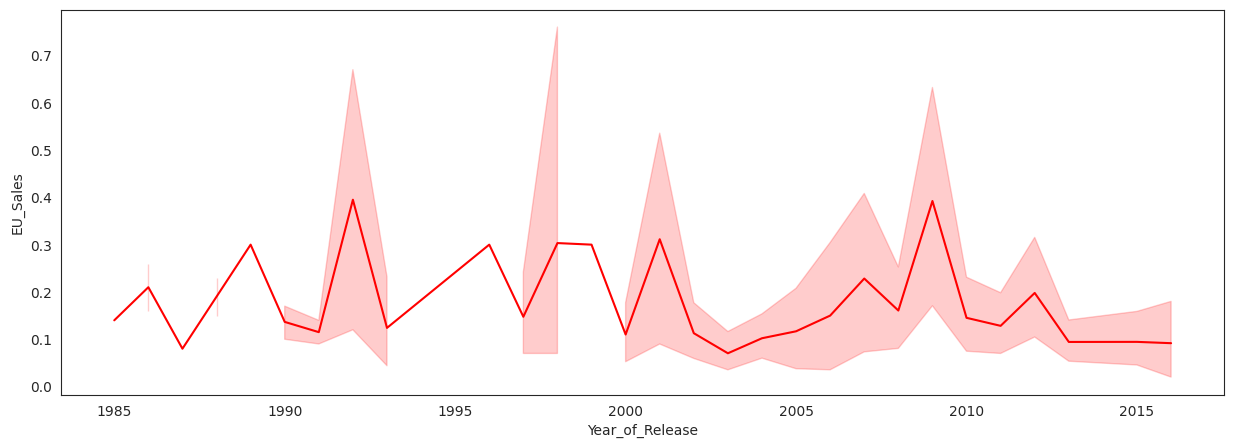

In [ ]:
fig = plt.figure(figsize=(15,5)) #ukuran canvas
sns.lineplot(data=df,x='Year_of_Release',y='EU_Sales', color='red')

##JP GROWTH SALES

In [ ]:
Growth_Sales = df.groupby(['Year_of_Release'], as_index=False).agg({'JP_Sales': 'sum'})

Growth_Sales['Growth'] = Growth_Sales['JP_Sales'].pct_change() * 100
Growth_Sales['Growth'] = Growth_Sales['Growth'].round(2).astype(str) + '%'

print(Growth_Sales)
#Growth_Sales['Growth'] = (Growth_Sales['JP_Sales'].pct_change() * 100).fillna(0)

    Year_of_Release  JP_Sales    Growth
0              1985      0.21      nan%
1              1986      1.38   557.14%
2              1987      0.27   -80.43%
3              1988      0.77   185.19%
4              1989      0.42   -45.45%
5              1990      1.43   240.48%
6              1991      0.96   -32.87%
7              1992      5.64    487.5%
8              1993      1.71   -69.68%
9              1994      0.16   -90.64%
10             1996      0.55   243.75%
11             1997      1.63   196.36%
12             1998      1.59    -2.45%
13             1999      0.10   -93.71%
14             2000      0.76    660.0%
15             2001      1.90    150.0%
16             2002      3.49    83.68%
17             2003      2.63   -24.64%
18             2004      1.31   -50.19%
19             2005      3.57   172.52%
20             2006      3.01   -15.69%
21             2007      4.03    33.89%
22             2008      5.42    34.49%
23             2009      3.14   -42.07%


<Axes: xlabel='Year_of_Release', ylabel='JP_Sales'>

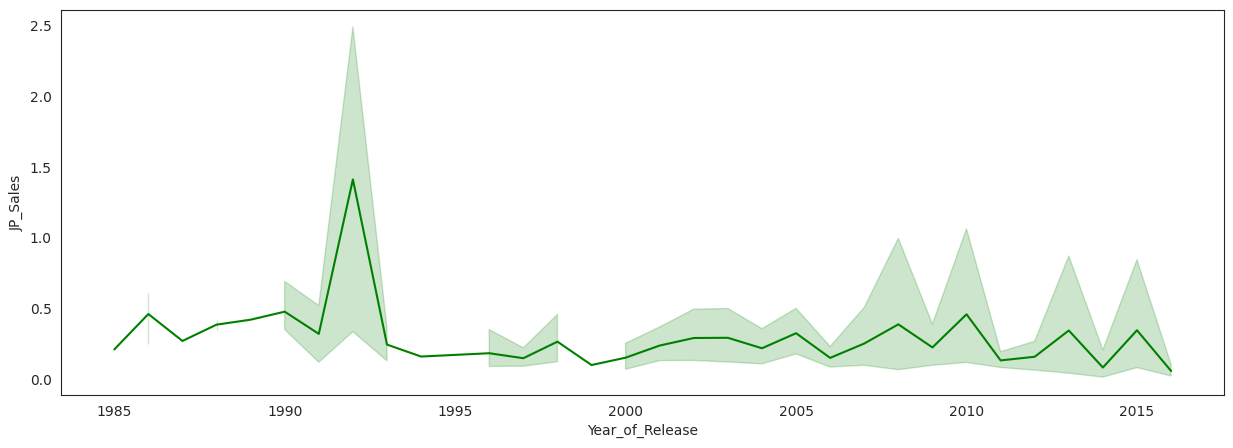

In [ ]:
fig = plt.figure(figsize=(15,5)) #ukuran canvas
sns.lineplot(data=df,x='Year_of_Release',y='JP_Sales', color='green')

##OTHER COUNTRIES GROWTH SALES

In [ ]:
Growth_Sales = df.groupby(['Year_of_Release'], as_index=False).agg({'Other_Sales': 'sum'})

Growth_Sales['Growth'] = Growth_Sales['Other_Sales'].pct_change() * 100
Growth_Sales['Growth'] = Growth_Sales['Growth'].round(2).astype(str) + '%'

print(Growth_Sales)
#Growth_Sales['Growth'] = (Growth_Sales['JP_Sales'].pct_change() * 100).fillna(0)

    Year_of_Release  Other_Sales   Growth
0              1985         0.00     nan%
1              1986         1.57     inf%
2              1987         0.01  -99.36%
3              1988         0.04   300.0%
4              1989         0.04     0.0%
5              1990         0.05    25.0%
6              1991         0.03   -40.0%
7              1992         0.23  666.67%
8              1993         0.31   34.78%
9              1994         0.00  -100.0%
10             1996         0.06     inf%
11             1997         0.17  183.33%
12             1998         0.20   17.65%
13             1999         0.05   -75.0%
14             2000         0.12   140.0%
15             2001         0.54   350.0%
16             2002         0.48  -11.11%
17             2003         0.53   10.42%
18             2004         0.51   -3.77%
19             2005         0.80   56.86%
20             2006         1.25   56.25%
21             2007         0.65   -48.0%
22             2008         1.29  

<Axes: xlabel='Year_of_Release', ylabel='Other_Sales'>

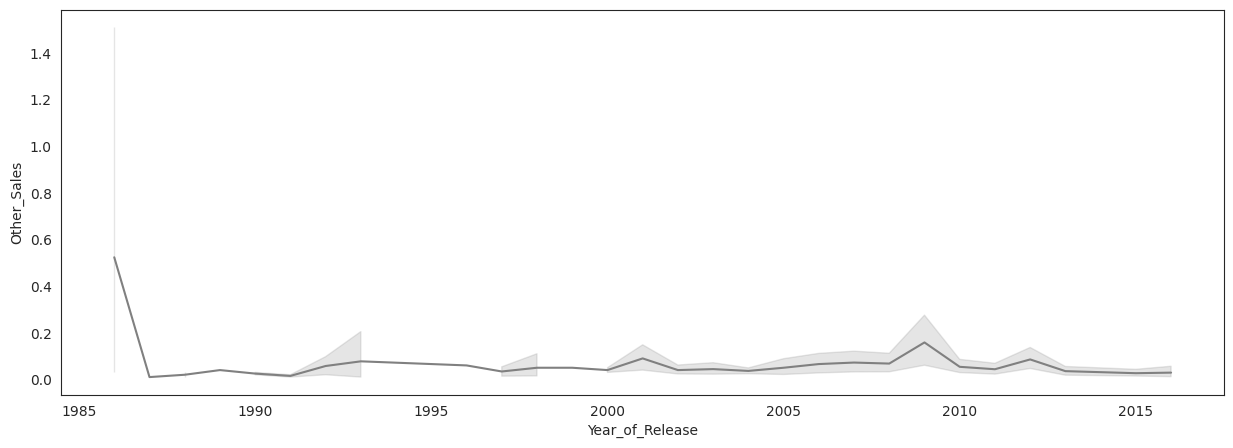

In [ ]:
fig = plt.figure(figsize=(15,5)) #ukuran canvas
sns.lineplot(data=df,x='Year_of_Release',y='Other_Sales', color='grey')

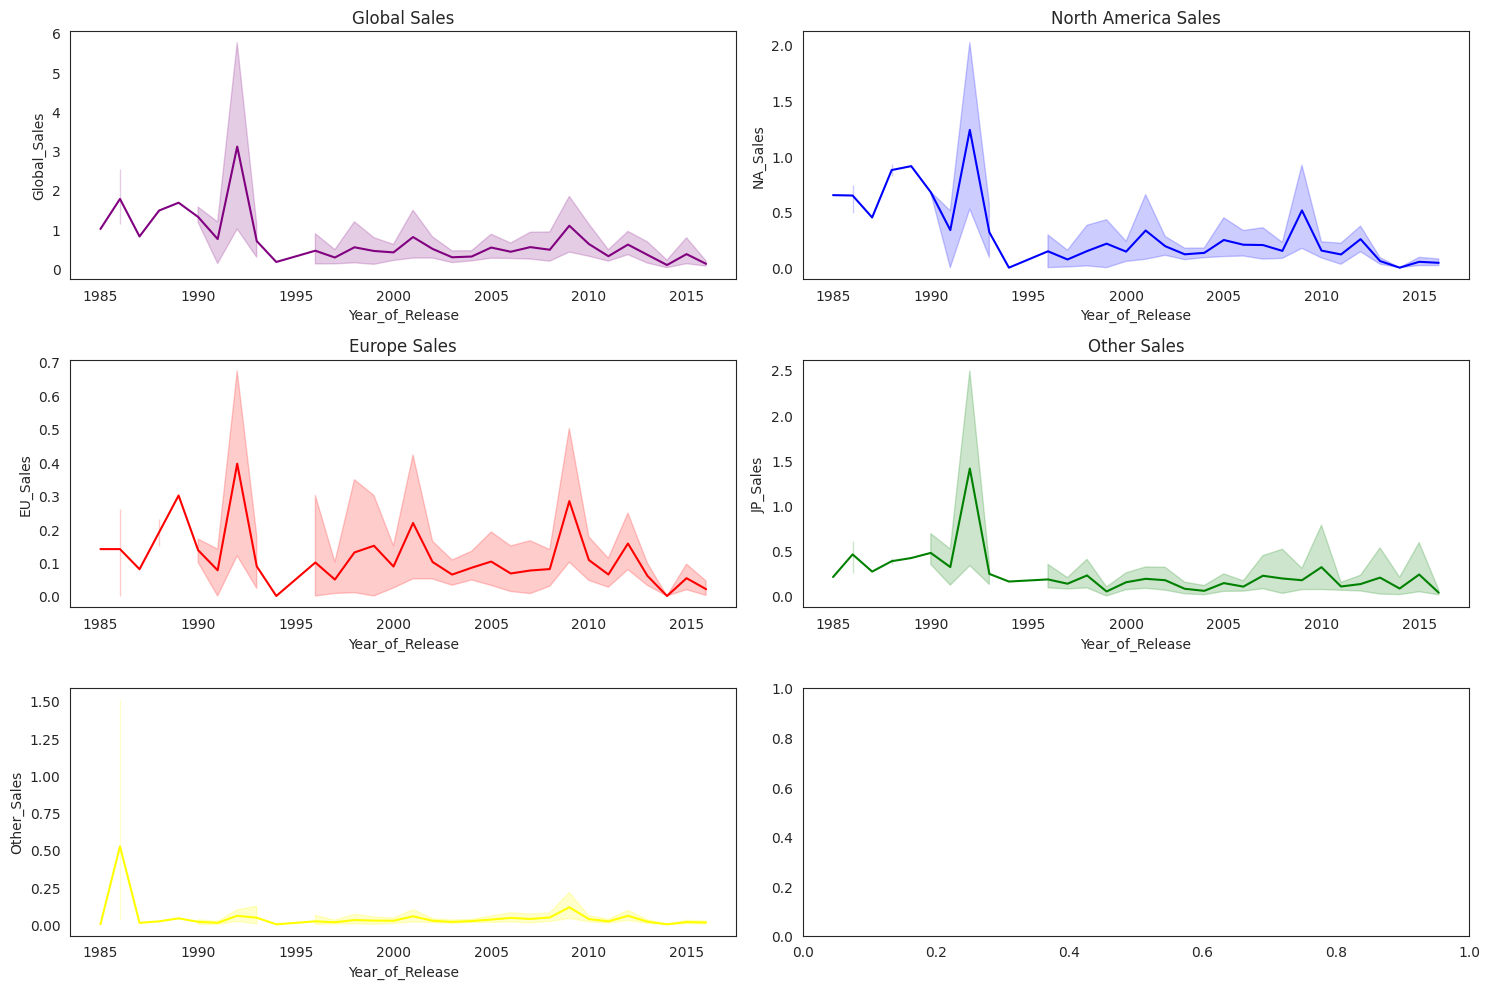

In [ ]:
# Load data into DataFrame
df = pd.read_csv(sheet_url_trf)

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

# Global sales plot
sns.lineplot(data=df,x='Year_of_Release',y='Global_Sales', color='purple', ax=axes[0,0])
axes[0,0].set_title('Global Sales')

# NA sales plot
sns.lineplot(data=df,x='Year_of_Release',y='NA_Sales', color='blue', ax=axes[0,1])
axes[0,1].set_title('North America Sales')

# EU sales plot
sns.lineplot(data=df,x='Year_of_Release',y='EU_Sales', color='red', ax=axes[1,0])
axes[1,0].set_title('Europe Sales')

# JP sales plot
sns.lineplot(data=df,x='Year_of_Release',y='JP_Sales', color='green', ax=axes[1,1])
axes[1,1].set_title('Japan Sales')

# Other sales plot
sns.lineplot(data=df,x='Year_of_Release',y='Other_Sales', color='yellow', ax=axes[2,0])
axes[1,1].set_title('Other Sales')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Insight: Since 1995, sales growth in the global market has decreased continuously and has never reached the highest sales peak as before, this also happened in North America and Japan. Sales growth in Europe is considered to be the best among other countries, even though in 1995 it experienced a drop in value because that year Capcom did not release a game but still consistently experienced an increase in sales every year. Other sales have the lowest sales growth among other countries

# EXPORT DATA CLEANING INTO CSV

In [ ]:
# writing to Excel
datatoexcel = pd.ExcelWriter('RFMScores.xlsx')
  
# write DataFrame to excel
df.to_excel(datatoexcel)
  
# save the excel
datatoexcel.save()
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


#USER PREFERENCE CAPCOM PRODUCT

In [ ]:
print(df['Rating'].unique())


[nan 'M' 'T' 'E' 'E10+']


In [ ]:
UP1 = df.groupby(['Rating'],as_index=False).agg({'Critic_Score':'mean','Name':'count'}).rename(columns={'Name':'Count_games'}).sort_values(by='Critic_Score', ascending=False)
UP1

,Rating,Critic_Score,Count_games
1,E10+,77.750000,4
3,T,73.882353,86
2,M,70.850000,85
0,E,68.622642,56


the average critical score game is in the range of 68-78 with T and M ratings dominating the most. It can be said that the average Capcom user is from 12 years old to 35 years old

In [ ]:
UP2 = df.groupby(['Rating'],as_index=False).agg({'User_Score':'mean','Name':'count'}).rename(columns={'Name':'Count_games'}).sort_values(by='User_Score', ascending=False)
UP2

,Rating,User_Score,Count_games
1,E10+,8.125000,4
0,E,7.671429,56
3,T,7.322500,86
2,M,7.218072,85


From a scale of 1-10, the average rating given by the user is in the range of 7-8. From the rating scale, it can be said that the user has a pleasant enough experience playing this game from Capcom

#IMPORT WHOLE DATA SET

In [ ]:
# IMPORT WHOLE DATASET

sheet_url = 'https://docs.google.com/spreadsheets/d/1Y4WmKxaRlsF_D2xe0o2I0isJSR16F-F4SABFPCpTwPs/edit#gid=0'
sheet_url_trf = sheet_url.replace('/edit#gid=','/export?format=csv&gid=')
df1 = pd.read_csv(sheet_url_trf)
df1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76,51,8,324,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,,,,,
2,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,,,,,
3,Tetris,G,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,,,,,
4,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82,73,"8,3",712,E


#WHOLE DATA PREPARATION

### Check Data Type

In [ ]:
df1.shape #Check how much column and rows

(17303, 15)

In [ ]:
df1.info() #Check table info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17303 entries, 0 to 17302
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17303 non-null  object 
 1   Platform         17303 non-null  object 
 2   Year_of_Release  17303 non-null  int64  
 3   Genre            17303 non-null  object 
 4   Publisher        17303 non-null  object 
 5   NA_Sales         17303 non-null  float64
 6   EU_Sales         17303 non-null  float64
 7   JP_Sales         17303 non-null  float64
 8   Other_Sales      17303 non-null  float64
 9   Global_Sales     17303 non-null  float64
 10  Critic_Score     17303 non-null  object 
 11  Critic_Count     17303 non-null  object 
 12  User_Score       17303 non-null  object 
 13  User_Count       17303 non-null  object 
 14  Rating           17303 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 2.0+ MB


In [ ]:
df1.isnull().sum() #Check how much null values exist

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Rating             0
dtype: int64

In [ ]:
df1_col = ['Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count']
for val in df1_col:
        df1[val] = pd.to_numeric(df1[val], errors='coerce')

In [ ]:
df1_col_num = ['Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count']

for val in df1_col_num:
    df1[val] = df1[val].astype(float)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17303 entries, 0 to 17302
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17303 non-null  object 
 1   Platform         17303 non-null  object 
 2   Year_of_Release  17303 non-null  int64  
 3   Genre            17303 non-null  object 
 4   Publisher        17303 non-null  object 
 5   NA_Sales         17303 non-null  float64
 6   EU_Sales         17303 non-null  float64
 7   JP_Sales         17303 non-null  float64
 8   Other_Sales      17303 non-null  float64
 9   Global_Sales     17303 non-null  float64
 10  Critic_Score     8313 non-null   float64
 11  Critic_Count     8313 non-null   float64
 12  User_Score       921 non-null    float64
 13  User_Count       7776 non-null   float64
 14  Rating           17303 non-null  object 
dtypes: float64(9), int64(1), object(5)
memory usage: 2.0+ MB


In [ ]:
df1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,
2,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,
3,Tetris,G,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,
4,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,NaN,712.0,E


### Check Duplicated

In [ ]:
df1.duplicated().sum()

0

there is no duplicate in our dataset

### Check Values and Typos

In [ ]:
# Platform 
df1['Platform'].value_counts()

DS       2227
PS2      2204
PS3      1355
Wii      1343
PSP      1298
X360     1294
PS       1199
PC       1107
GBA       836
X         833
GC        562
3DS       544
PSV       491
PS4       423
N64       319
XOne      263
SNES      239
SAT       173
WiiU      153
A2600     133
NES        98
G          98
DC         52
GEN        27
NG         12
WS          7
SCD         6
3DO         3
TG16        2
GG          1
PCFX        1
Name: Platform, dtype: int64

In [ ]:
# Genre
df1['Genre'].value_counts()

Action          3483
Sports          2401
Misc            1798
Role-Playing    1538
Adventure       1459
Shooter         1347
Racing          1276
Simulation       918
Platform         895
Fighting         863
Strategy         726
Puzzle           599
Name: Genre, dtype: int64

In [ ]:
# Year
df1['Year_of_Release'].value_counts()

2009    1548
2008    1535
2010    1314
2007    1260
2011    1174
2006    1065
2005     965
2002     866
2003     801
2004     777
2012     683
2015     648
2014     630
2016     612
2013     573
2001     489
1998     382
2000     354
1999     343
1997     294
1996     263
1995     219
1994     121
1993      60
1981      46
1992      44
1991      41
1982      37
1986      21
1983      18
1989      17
1987      16
1990      16
1988      15
1980      14
1984      14
1985      14
2017       5
1978       4
1977       3
1976       1
1979       1
Name: Year_of_Release, dtype: int64

there is no typos in our data set

### Handling Missing Values

In [ ]:
df1.isnull().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score        8990
Critic_Count        8990
User_Score         16382
User_Count          9527
Rating                 0
dtype: int64

**missing value pada Critic_Score,Critic_Count, User_Score, User_Count, Rating , tidak dihilangkan dikarenakan untuk melihat user preference dari product CAPCOM.**

### Handling Outlier

In [ ]:
df1.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating'],
      dtype='object')

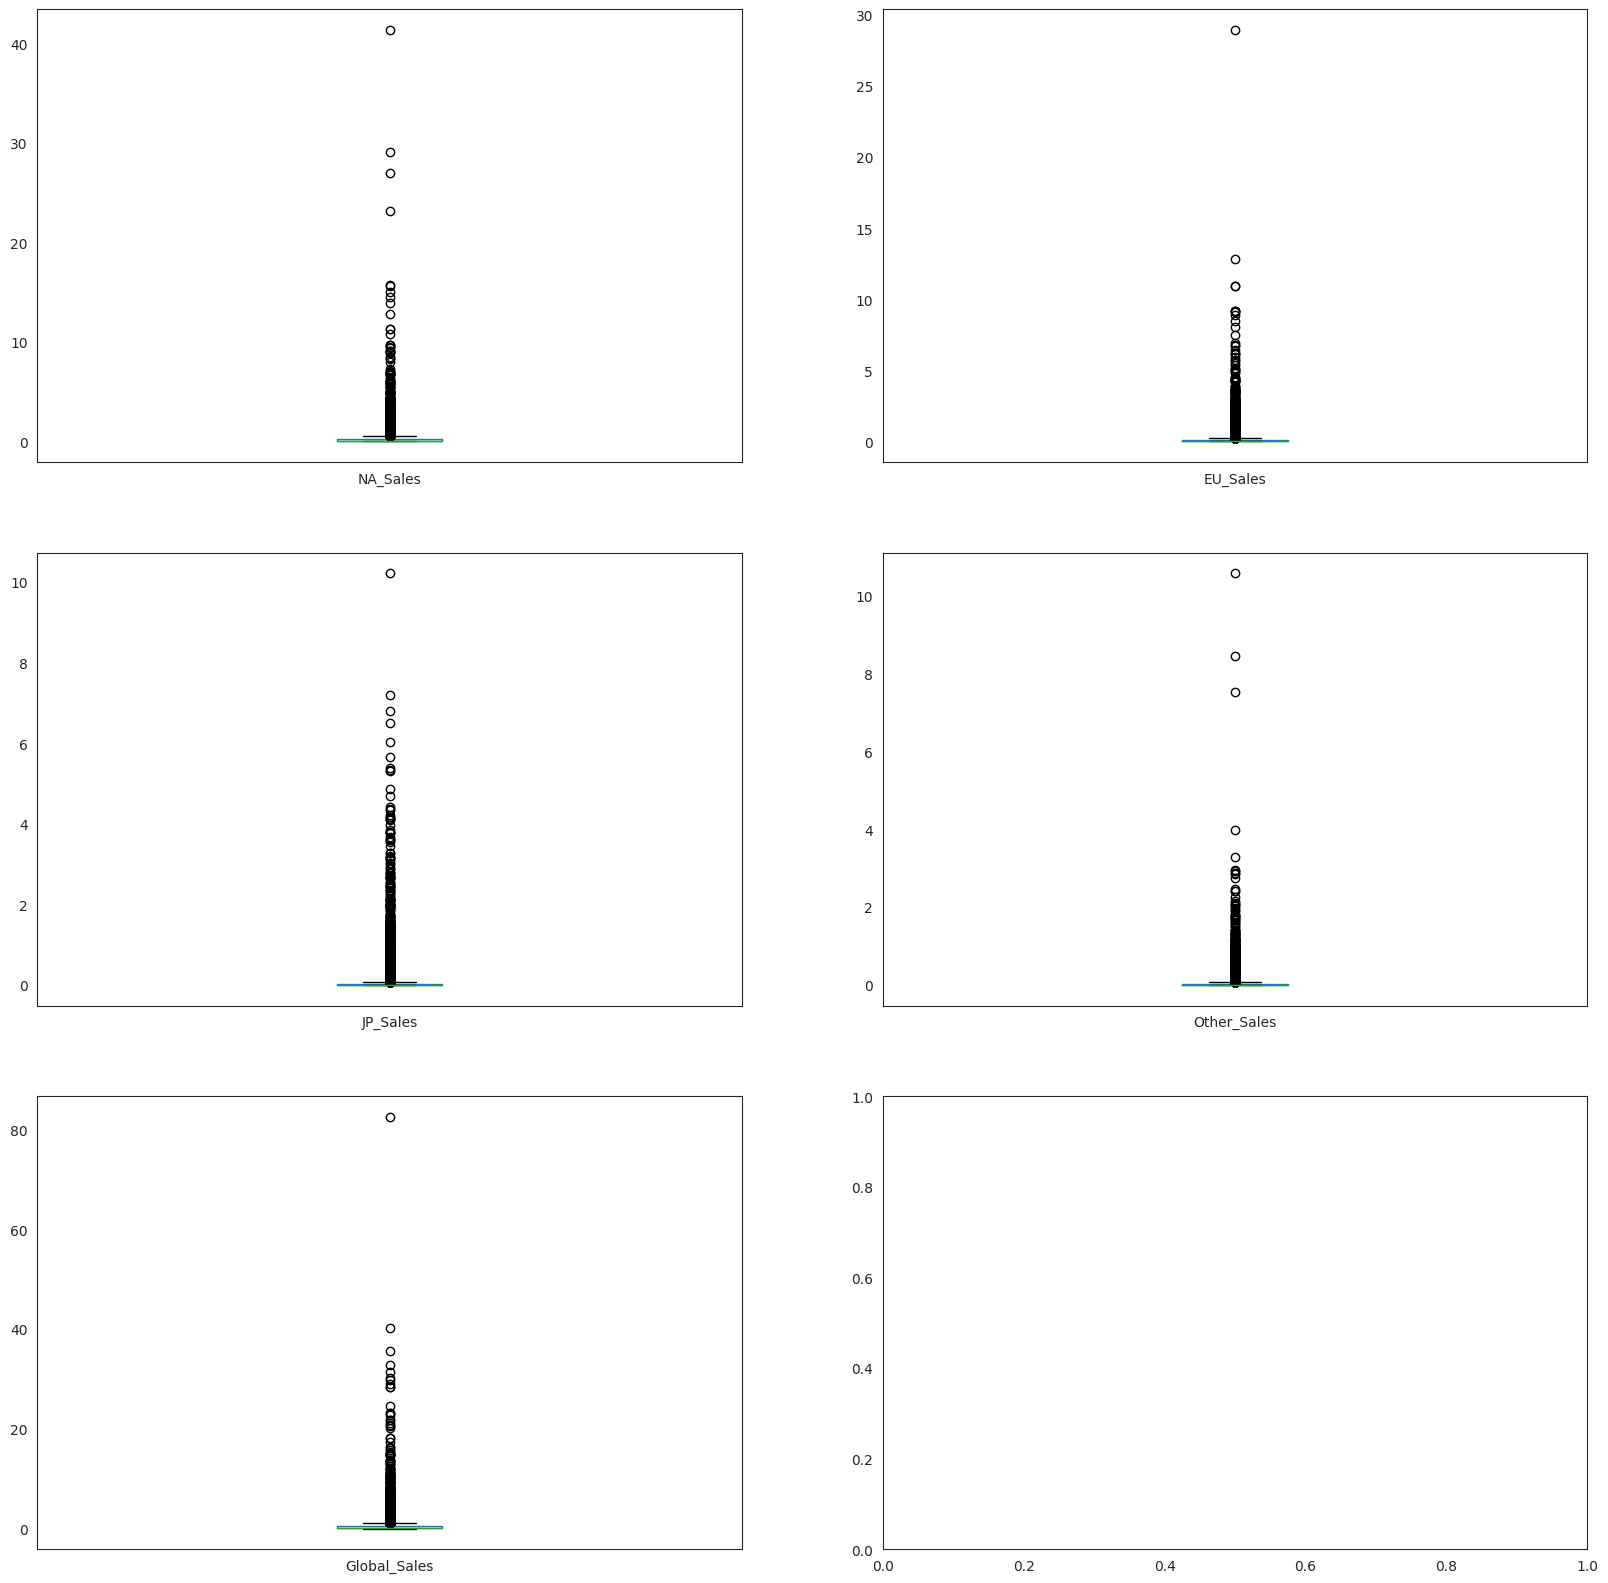

In [ ]:
# CREATE BOXPLOT FOR THOSE COLUMNS

df1_boxplot = df1[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].copy()

fig,axes = plt.subplots(nrows=3, ncols=2,figsize=(20,20))

for i,el in enumerate(df1_boxplot.columns):
   a = df1.boxplot (el, ax=axes.flatten()[i], grid=False )
plt.show()

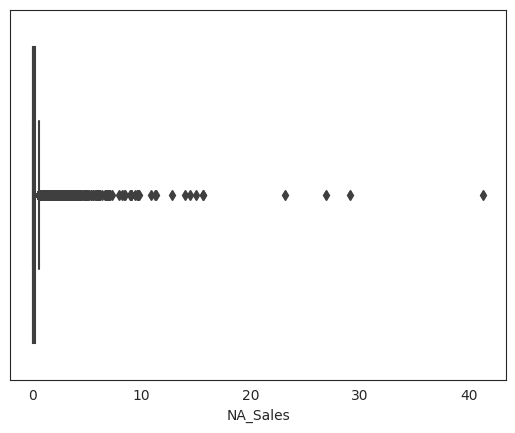

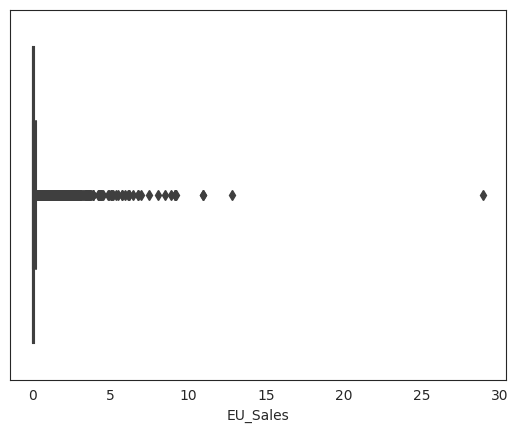

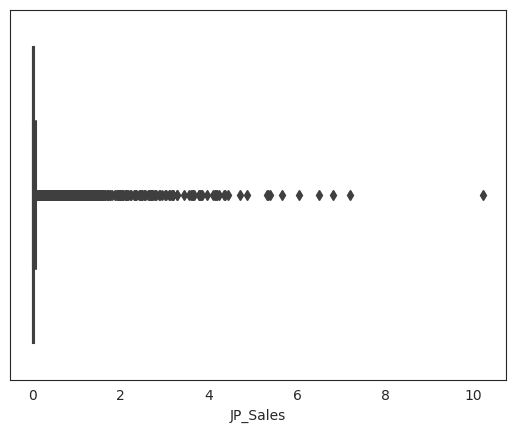

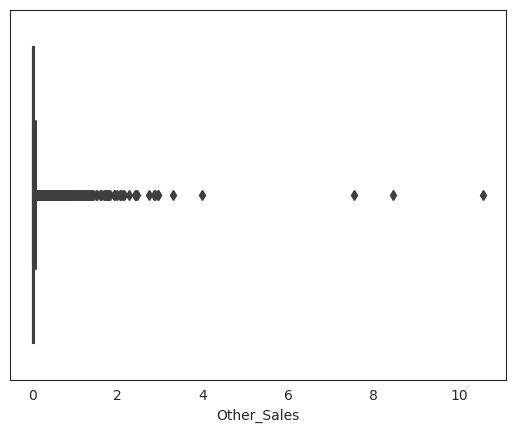

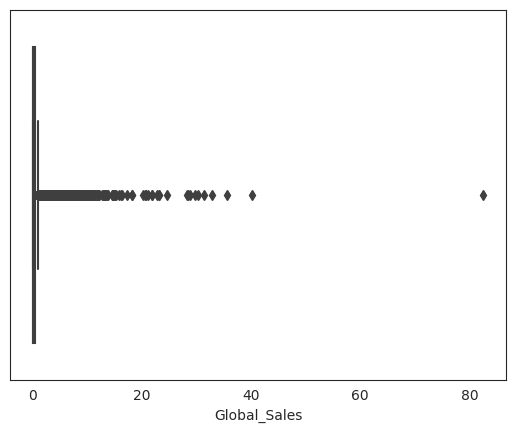

In [ ]:
#Checking the data distribution
numeric_cols = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for col in numeric_cols:
    sns.boxplot(data= df1, x=col)
    plt.show()

In [ ]:
#Check the Q1,Q3,IQR,UB & LB

#na = NA_Saless
Q1_na = df1['NA_Sales'].quantile(.25)
Q3_na = df1['NA_Sales'].quantile(.75)

# IQR
IQR_na = Q3_na - Q1_na
LB_na = Q1_na - 1.5 * IQR_na
UB_na = Q3_na + 1.5 * IQR_na
print('Q1:\n',Q1_na)
print('\nQ3:\n',Q3_na)
print('\nIQR:\n',IQR_na)
print('\nMin:\n',LB_na)
print('\nMax:\n',UB_na)

Q1:
 0.0

Q3:
 0.23

IQR:
 0.23

Min:
 -0.34500000000000003

Max:
 0.5750000000000001


In [ ]:
#Check the Q1,Q3,IQR,UB & LB

#eu = EU_Sales
Q1_eu = df1['EU_Sales'].quantile(.25)
Q3_eu = df1['EU_Sales'].quantile(.75)

# IQR
IQR_eu = Q3_eu - Q1_eu
LB_eu = Q1_eu - 1.5 * IQR_eu
UB_eu = Q3_eu + 1.5 * IQR_eu
print('Q1:\n',Q1_eu)
print('\nQ3:\n',Q3_eu)
print('\nIQR:\n',IQR_eu)
print('\nMin:\n',LB_eu)
print('\nMax:\n',UB_eu)

Q1:
 0.0

Q3:
 0.1

IQR:
 0.1

Min:
 -0.15000000000000002

Max:
 0.25


In [ ]:
#Check the Q1,Q3,IQR,UB & LB

#jp = JP_Sales
Q1_jp = df1['JP_Sales'].quantile(.25)
Q3_jp = df1['JP_Sales'].quantile(.75)

# IQR
IQR_jp = Q3_jp - Q1_jp
LB_jp = Q1_jp - 1.5 * IQR_jp
UB_jp = Q3_jp + 1.5 * IQR_jp
print('Q1:\n',Q1_jp)
print('\nQ3:\n',Q3_jp)
print('\nIQR:\n',IQR_jp)
print('\nMin:\n',LB_jp)
print('\nMax:\n',UB_jp)

Q1:
 0.0

Q3:
 0.03

IQR:
 0.03

Min:
 -0.045

Max:
 0.075


In [ ]:
#Check the Q1,Q3,IQR,UB & LB

#ot = Other_Sales
Q1_ot = df1['Other_Sales'].quantile(.25)
Q3_ot = df1['Other_Sales'].quantile(.75)

# IQR
IQR_ot = Q3_ot - Q1_ot
LB_ot = Q1_ot - 1.5 * IQR_ot
UB_ot = Q3_ot + 1.5 * IQR_ot
print('Q1:\n',Q1_ot)
print('\nQ3:\n',Q3_ot)
print('\nIQR:\n',IQR_ot)
print('\nMin:\n',LB_ot)
print('\nMax:\n',UB_ot)

Q1:
 0.0

Q3:
 0.03

IQR:
 0.03

Min:
 -0.045

Max:
 0.075


In [ ]:
#Check the Q1,Q3,IQR,UB & LB

#gs = Global_Sales
Q1_gs = df1['Global_Sales'].quantile(.25)
Q3_gs = df1['Global_Sales'].quantile(.75)

# IQR
IQR_gs = Q3_gs - Q1_gs
LB_gs = Q1_gs - 1.5 * IQR_gs
UB_gs = Q3_gs + 1.5 * IQR_gs
print('Q1:\n',Q1_gs)
print('\nQ3:\n',Q3_gs)
print('\nIQR:\n',IQR_gs)
print('\nMin:\n',LB_gs)
print('\nMax:\n',UB_gs)


Q1:
 0.05

Q3:
 0.45

IQR:
 0.4

Min:
 -0.55

Max:
 1.05


we don remove the outliers because every data sales is important 

# EDA WHOLE

## Statistic Descriptive

In [ ]:
# change 0 value to nan to prevent 0 being count when finding out statistic description

df1.replace(0,np.nan,inplace=True)

In [ ]:
df1.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating'],
      dtype='object')

In [ ]:
# Numerical columns

df1[['Year_of_Release','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,17303.000000,12300.000000,10974.000000,6515.000000,10166.000000,17303.000000,8313.000000,8313.000000,920.000000,7776.000000
mean,2006.605849,0.360177,0.223188,0.200379,0.078624,0.519506,68.924456,26.224708,7.023913,162.839120
std,5.905235,0.932575,0.611688,0.470103,0.235348,1.530615,13.967421,19.003705,1.556856,563.507263
min,1976.000000,0.010000,0.010000,0.010000,0.010000,0.010000,13.000000,3.000000,1.000000,4.000000
25%,2003.000000,0.060000,0.020000,0.020000,0.010000,0.050000,60.000000,11.000000,6.000000,10.000000
50%,2008.000000,0.140000,0.060000,0.060000,0.020000,0.160000,71.000000,21.000000,7.000000,24.000000
75%,2010.000000,0.340000,0.200000,0.180000,0.070000,0.450000,79.000000,36.000000,8.000000,81.000000
max,2017.000000,41.360000,28.960000,10.220000,10.570000,82.540000,98.000000,113.000000,9.000000,10766.000000


Insight :


In [ ]:
# Categorical columns

df1[['Name', 'Platform','Genre','Rating']].describe()

,Name,Platform,Genre,Rating
count,17303,17303,17303,17303
unique,11981,31,12,9
top,Need for Speed: Most Wanted,DS,Action,
freq,12,2227,3483,7097


*   Terdapat 399 jenis game yang dikeluarkan oleh CapCom
*   Dead Rising 2 merupakan game yang paling digemari 
*   PS2 merupakan platform yang paling banyak digunakan 
*   Genre Action merupakan genre yang paling digemari
*   Rating pengguna paling banyak adalah T







## Number of Games based on Year Release in every country

In [ ]:
EDA21 = df1.groupby('Year_of_Release',as_index=False)[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Name']].agg({'Global_Sales':'sum','NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Name':'nunique'}).rename(columns={'Name':'Count_games'})
EDA21

,Year_of_Release,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Count_games
0,1976,0.44,0.41,0.03,0.00,0.00,1
1,1977,1.98,1.86,0.11,0.00,0.01,3
2,1978,3.27,3.05,0.18,0.00,0.03,4
3,1979,0.31,0.29,0.02,0.00,0.00,1
4,1980,14.94,13.91,0.88,0.00,0.15,14
5,1981,35.77,33.40,1.96,0.00,0.32,46
6,1982,29.33,27.36,1.68,0.00,0.31,37
7,1983,17.06,8.01,0.82,8.10,0.14,18
8,1984,50.36,33.28,2.10,14.27,0.70,14
9,1985,53.94,33.73,4.74,14.56,0.92,14


##Revision

In [ ]:
EDA2R1 = df1.groupby(['Year_of_Release'],as_index=False).agg({'Name':'nunique'}).rename(columns={'Name':'Count_games'})
EDA2R1.head()

,Year_of_Release,Count_games
0,1976,1
1,1977,3
2,1978,4
3,1979,1
4,1980,14


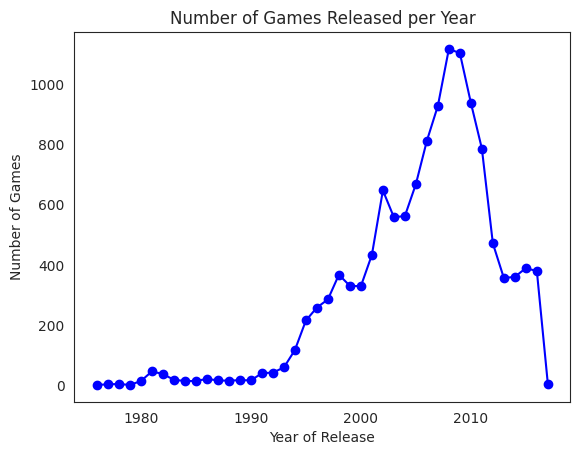

In [ ]:
fig, ax = plt.subplots()

ax.plot(EDA2R1['Year_of_Release'], EDA2R1['Count_games'], marker='o', color='blue')

ax.set_title('Number of Games Released per Year')
ax.set_xlabel('Year of Release')
ax.set_ylabel('Number of Games')

plt.show()

from the line chart we can get the insight that awal mula dibentuknya game ini sangat tidak stabil diawal terbentuknya mulai mengalami peningkatan dengan mengeluarkan lebih banyak game di tiap tahunnya dimana puncaknya di tahun 2003 capcom mengeluarkan 30 jenis game dan setelah itu mengalami penurunan seiringnya berjalannya waktu

## Genre based on Year Release in every country

In [ ]:
EDA2 = df.groupby('Year_of_Release',as_index=False)[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Genre']].agg({'Global_Sales':'sum','NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Genre':'nunique'})
EDA2

,Year_of_Release,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Genre
0,1985,1.00,0.65,0.14,0.21,0.00,1
1,1986,5.30,1.94,0.42,1.38,1.57,2
2,1987,0.81,0.45,0.08,0.27,0.01,1
3,1988,2.94,1.75,0.38,0.77,0.04,2
4,1989,1.67,0.91,0.30,0.42,0.04,1
5,1990,3.92,2.03,0.41,1.43,0.05,2
6,1991,2.23,1.01,0.23,0.96,0.03,2
7,1992,12.40,4.94,1.58,5.64,0.23,2
8,1993,4.85,2.22,0.62,1.71,0.31,4
9,1994,0.16,0.00,0.00,0.16,0.00,1


##Sales Per Genre

In [ ]:
EDA31 = df1.groupby(['Genre'],as_index=False).agg({'Name':'nunique','NA_Sales':'sum', 'EU_Sales':'sum', 'JP_Sales':'sum', 'Other_Sales':'sum','Global_Sales':'sum'}).rename(columns={'Name':'Count_games'}).sort_values(by='Global_Sales', ascending=False)
EDA31

,Genre,Count_games,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,2036,885.10,525.14,163.25,186.54,1761.15
10,Sports,1397,688.40,380.10,135.80,135.67,1340.71
8,Shooter,840,599.97,321.79,39.02,106.03,1067.22
7,Role-Playing,1255,336.64,193.49,357.82,61.11,948.99
4,Platform,590,446.74,201.72,131.37,51.36,831.47
3,Misc,1370,408.67,214.13,108.57,74.81,806.94
6,Racing,786,360.40,237.57,56.84,76.36,731.53
2,Fighting,621,224.13,100.74,87.84,36.51,449.13
9,Simulation,765,182.66,114.79,64.12,30.85,392.64
5,Puzzle,509,122.86,49.98,57.33,12.39,243.14


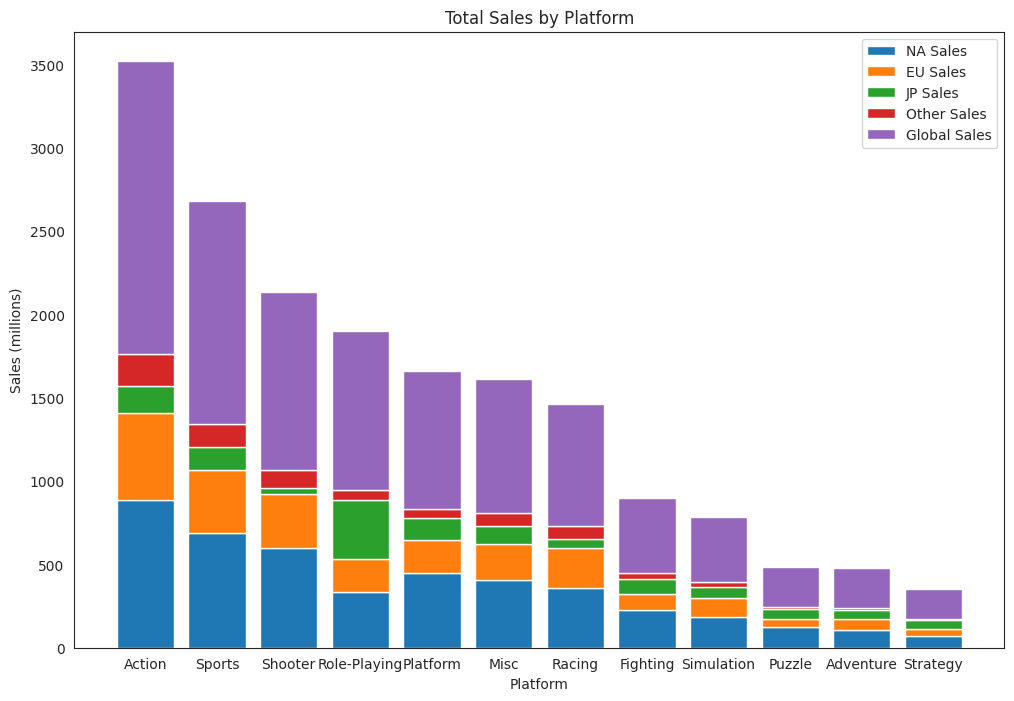

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))


ax.bar(EDA31['Genre'], EDA31['NA_Sales'], label='NA Sales')
ax.bar(EDA31['Genre'], EDA31['EU_Sales'], bottom=EDA31['NA_Sales'], label='EU Sales')
ax.bar(EDA31['Genre'], EDA31['JP_Sales'], bottom=EDA31['NA_Sales']+EDA31['EU_Sales'], label='JP Sales')
ax.bar(EDA31['Genre'], EDA31['Other_Sales'], bottom=EDA31['NA_Sales']+EDA31['EU_Sales']+EDA31['JP_Sales'], label='Other Sales')
ax.bar(EDA31['Genre'], EDA31['Global_Sales'], bottom=EDA31['NA_Sales']+EDA31['EU_Sales']+EDA31['JP_Sales']+EDA31['Other_Sales'], label='Global Sales')


ax.set_title('Total Sales by Platform')
ax.set_xlabel('Platform')
ax.set_ylabel('Sales (millions)')


ax.legend()


plt.show()

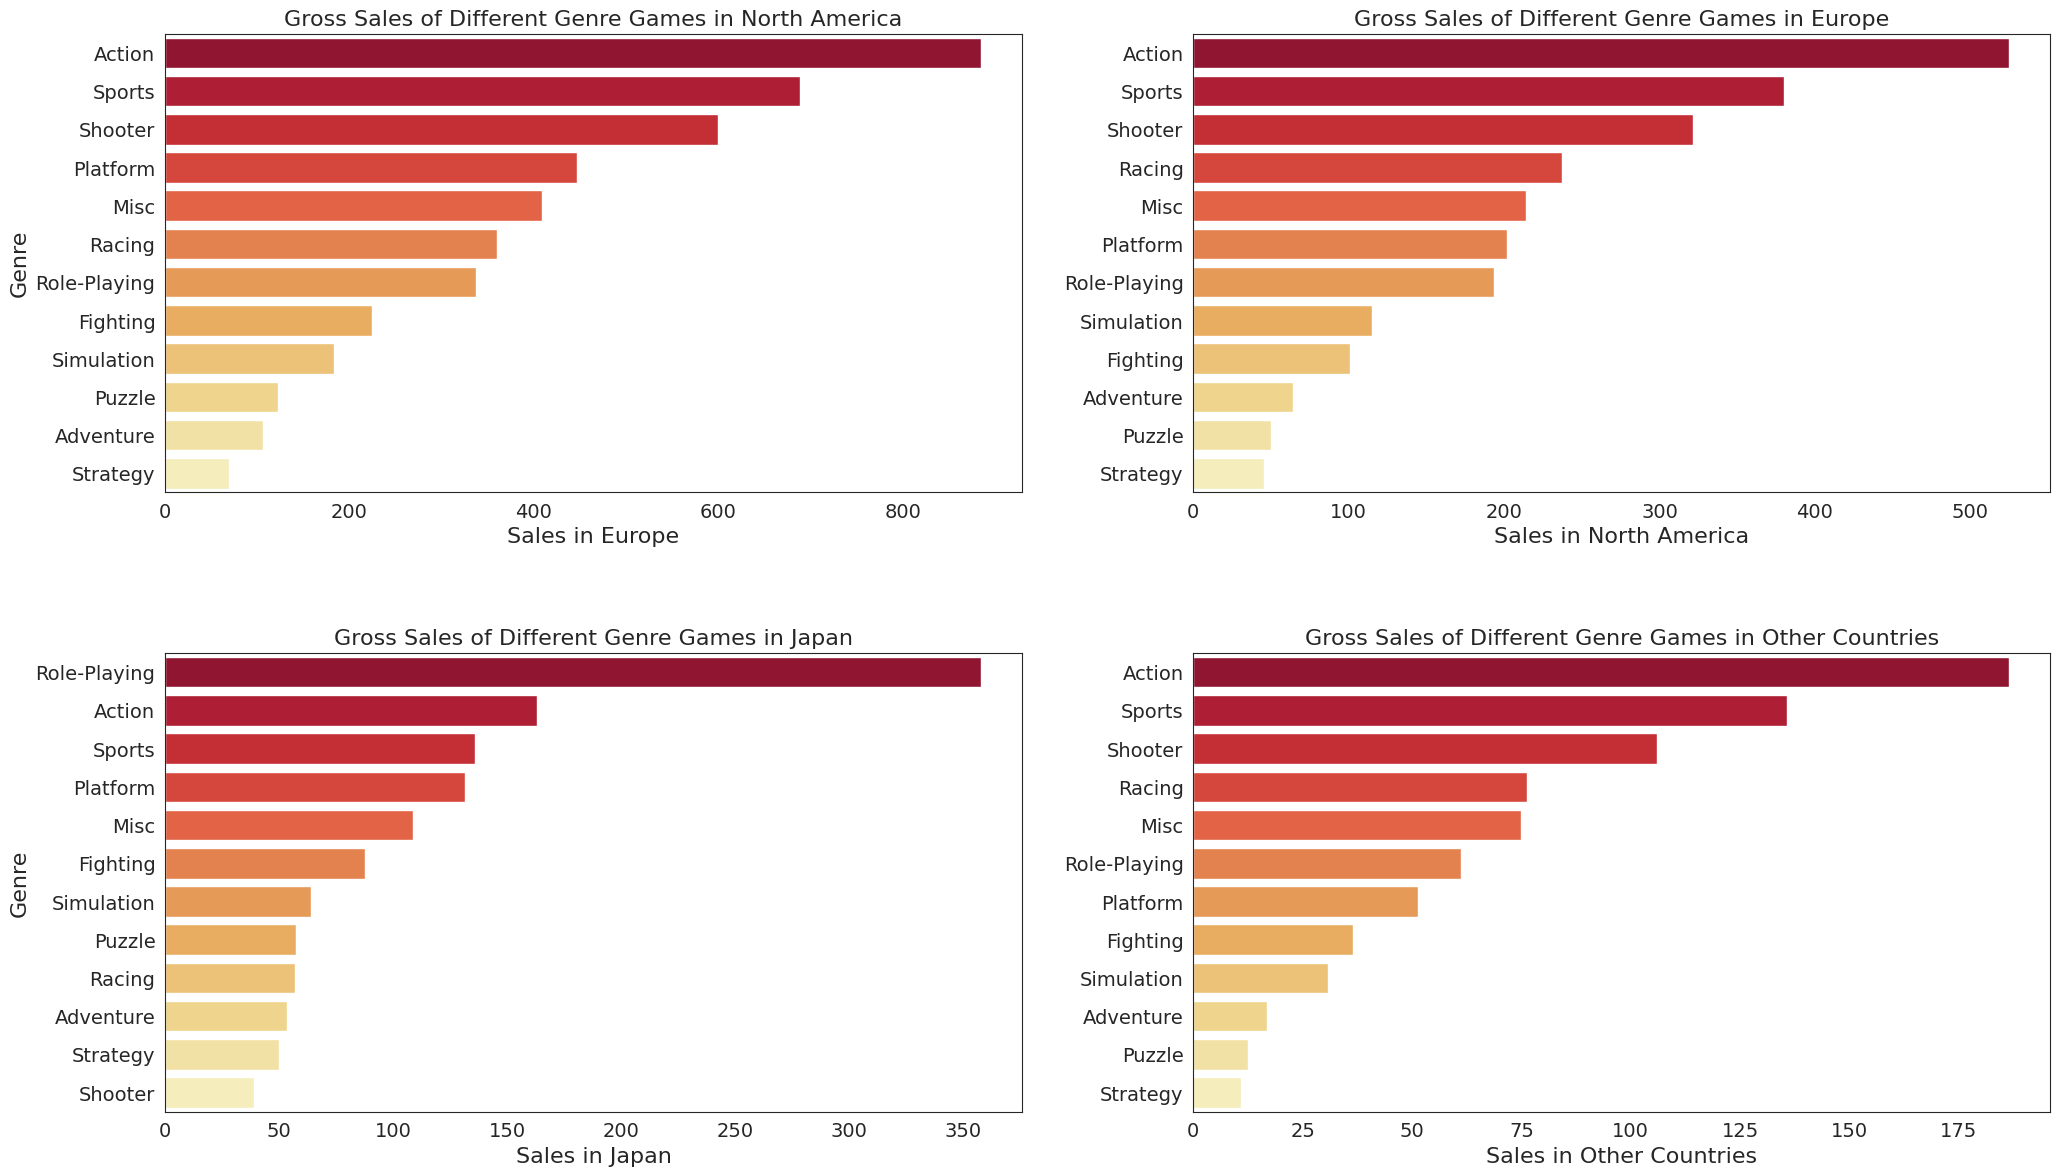

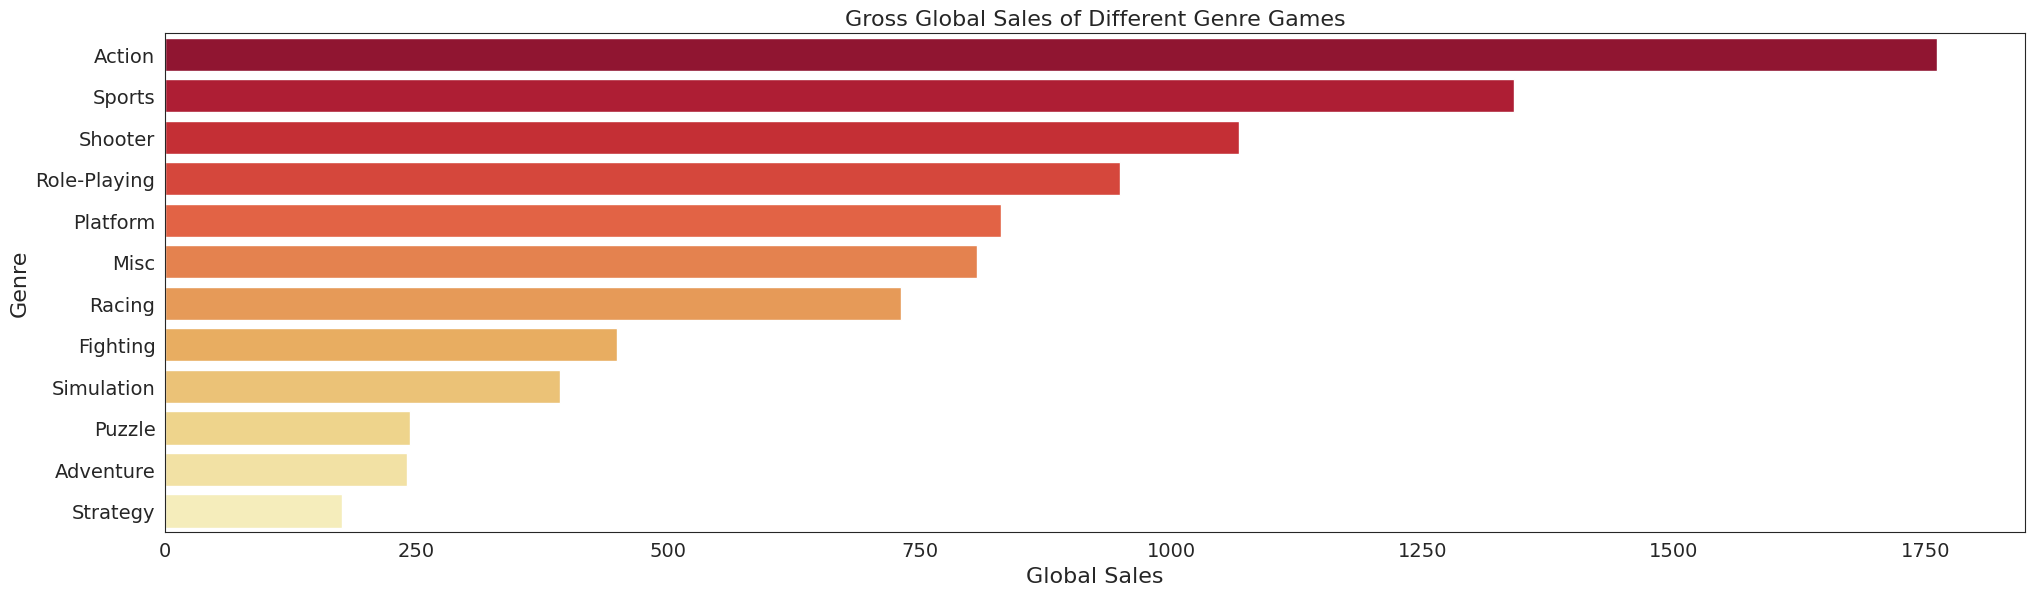

In [ ]:
# Graph 
fig=plt.figure(figsize=(29,14))
plt.subplots_adjust(left=0.25, wspace=0.20, hspace=0.35)
sns.set_style("white")


plt.subplot(2, 2, 1)
plt.title('Gross Sales of Different Genre Games in North America',fontdict={'fontsize':16})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.barplot(y='Genre', x='NA_Sales', data=EDA31.sort_values('NA_Sales',ascending=False),palette='YlOrRd_r');
plt.ylabel('Genre',fontdict={'fontsize':16})
plt.xlabel('Sales in Europe',fontdict={'fontsize':16})


plt.subplot(2, 2, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Sales of Different Genre Games in Europe',fontdict={'fontsize':16})
sns.barplot(y='Genre', x='EU_Sales', data=EDA31.sort_values('EU_Sales',ascending=False),palette='YlOrRd_r');
plt.ylabel('',fontdict={'fontsize':16})
plt.xlabel('Sales in North America',fontdict={'fontsize':16})


plt.subplot(2, 2, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Sales of Different Genre Games in Japan',fontdict={'fontsize':16})
sns.barplot(y='Genre', x='JP_Sales', data=EDA31.sort_values('JP_Sales',ascending=False),palette='YlOrRd_r');
plt.ylabel('Genre',fontdict={'fontsize':16})
plt.xlabel('Sales in Japan',fontdict={'fontsize':16})




plt.subplot(2, 2, 4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Sales of Different Genre Games in Other Countries',fontdict={'fontsize':16})
sns.barplot(y='Genre', x='Other_Sales', data=EDA31.sort_values('Other_Sales',ascending=False),palette='YlOrRd_r');
plt.ylabel('',fontdict={'fontsize':16})
plt.xlabel('Sales in Other Countries',fontdict={'fontsize':16})


fig=plt.figure(figsize=(24,22))
plt.subplot2grid((3,1), (1,0))
sns.set_style("white")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Gross Global Sales of Different Genre Games',fontdict={'fontsize':16})
sns.barplot(y='Genre', x='Global_Sales', data=EDA31.sort_values('Global_Sales',ascending=False),palette='YlOrRd_r');
plt.ylabel('Genre',fontdict={'fontsize':16})
plt.xlabel('Global Sales',fontdict={'fontsize':16});

##Sales Per Platform

In [ ]:
EDA41 = df1.groupby(['Platform'],as_index=False).agg({'Name':'nunique','NA_Sales':'sum', 'EU_Sales':'sum', 'JP_Sales':'sum', 'Other_Sales':'sum','Global_Sales':'sum'}).rename(columns={'Name':'Count_games'}).sort_values(by='Global_Sales', ascending=False)
EDA41

,Platform,Count_games,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,PS2,2204,583.81,339.27,139.58,193.43,1256.00
29,X360,1292,604.40,271.99,12.58,86.04,975.33
17,PS3,1353,394.48,331.66,80.53,136.24,942.80
26,Wii,1343,497.43,262.88,69.46,79.13,909.53
4,DS,2227,382.76,189.00,176.05,59.32,807.87
15,PS,1199,336.45,213.56,139.83,40.90,730.57
18,PS4,423,118.87,151.25,18.11,52.52,340.70
6,GBA,836,186.57,74.85,47.29,7.71,317.19
19,PSP,1298,109.49,66.82,77.30,41.52,295.44
1,3DS,544,87.31,65.74,103.13,14.07,270.37


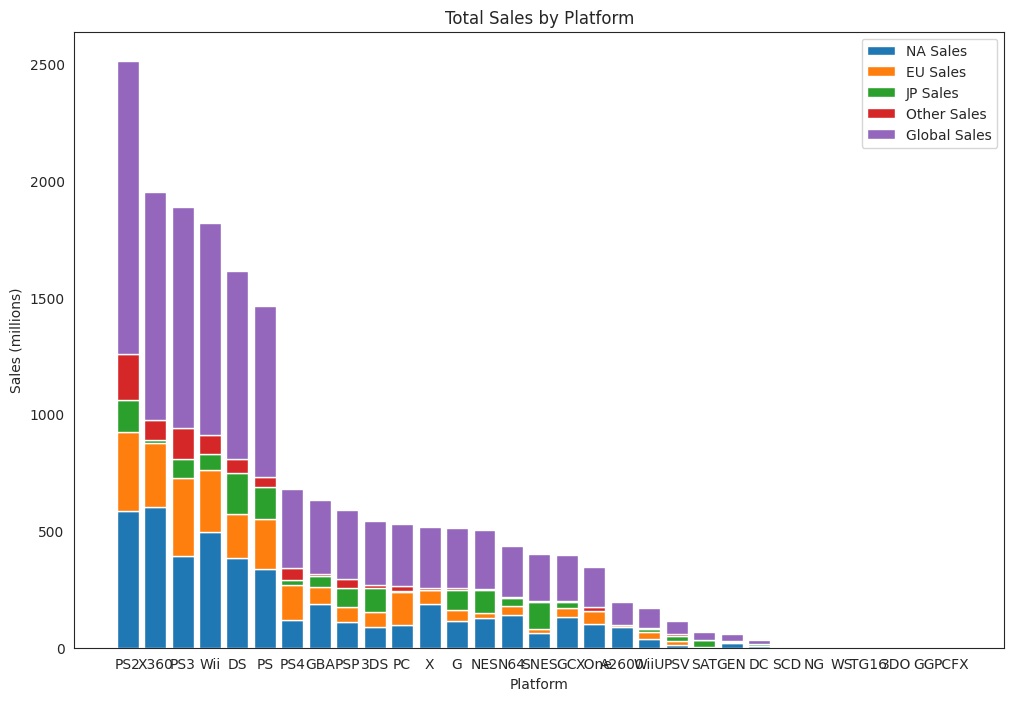

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))


ax.bar(EDA41['Platform'], EDA41['NA_Sales'], label='NA Sales')
ax.bar(EDA41['Platform'], EDA41['EU_Sales'], bottom=EDA41['NA_Sales'], label='EU Sales')
ax.bar(EDA41['Platform'], EDA41['JP_Sales'], bottom=EDA41['NA_Sales']+EDA41['EU_Sales'], label='JP Sales')
ax.bar(EDA41['Platform'], EDA41['Other_Sales'], bottom=EDA41['NA_Sales']+EDA41['EU_Sales']+EDA41['JP_Sales'], label='Other Sales')
ax.bar(EDA41['Platform'], EDA41['Global_Sales'], bottom=EDA41['NA_Sales']+EDA41['EU_Sales']+EDA41['JP_Sales']+EDA41['Other_Sales'], label='Global Sales')


ax.set_title('Total Sales by Platform')
ax.set_xlabel('Platform')
ax.set_ylabel('Sales (millions)')


ax.legend()


plt.show()

##Sales Per Year

In [ ]:
EDA51 = df1.groupby(['Year_of_Release'],as_index=False).agg({'NA_Sales':'sum', 'EU_Sales':'sum', 'JP_Sales':'sum', 'Other_Sales':'sum','Global_Sales':'sum'})
EDA51.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1976,0.41,0.03,0.0,0.00,0.44
1,1977,1.86,0.11,0.0,0.01,1.98
2,1978,3.05,0.18,0.0,0.03,3.27
3,1979,0.29,0.02,0.0,0.00,0.31
4,1980,13.91,0.88,0.0,0.15,14.94


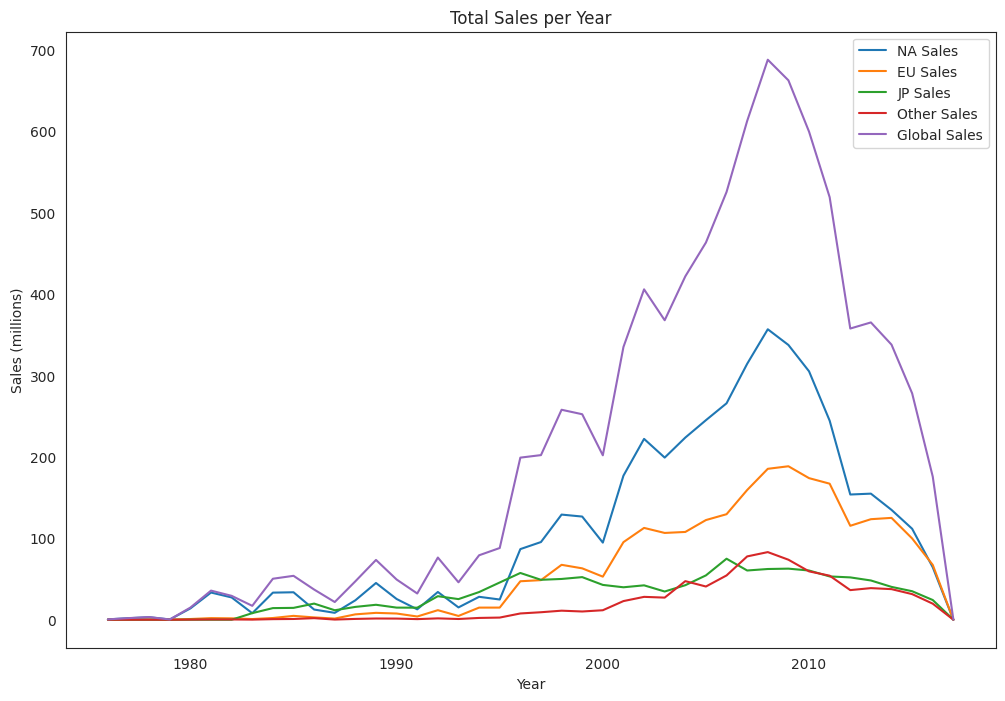

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))


ax.plot(EDA51['Year_of_Release'], EDA51['NA_Sales'], label='NA Sales')
ax.plot(EDA51['Year_of_Release'], EDA51['EU_Sales'], label='EU Sales')
ax.plot(EDA51['Year_of_Release'], EDA51['JP_Sales'], label='JP Sales')
ax.plot(EDA51['Year_of_Release'], EDA51['Other_Sales'], label='Other Sales')
ax.plot(EDA51['Year_of_Release'], EDA51['Global_Sales'], label='Global Sales')


ax.set_title('Total Sales per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Sales (millions)')


ax.legend()


plt.show()

##Name Platform Global Sales

In [ ]:
EDA61 = df1.groupby(['Name'],as_index=False).agg({'Platform':'count','Global_Sales':'sum'}).rename(columns={'Platform':'Count_games'}).sort_values(by='Global_Sales', ascending=False)
EDA61.head()

,Name,Count_games,Global_Sales
11463,Wii Sports,1,82.54
3865,Grand Theft Auto V,5,57.75
9735,Super Mario Bros.,2,45.31
10132,Tetris,2,35.84
5821,Mario Kart Wii,1,35.57


##Rating per Global Sales

In [ ]:
EDA71 = df1.groupby(['Rating'],as_index=False).agg({'Global_Sales':'sum','Name':'count'}).rename(columns={'Name':'Count_games'}).sort_values(by='Global_Sales', ascending=False)
EDA71

,Rating,Global_Sales,Count_games
0,,2836.92,7097
2,E,2462.86,4095
8,T,1518.14,3035
6,M,1497.77,1598
3,E10+,665.17,1463
5,K A,4.33,3
1,AO,1.95,1
4,EC,1.79,8
7,RP,0.09,3


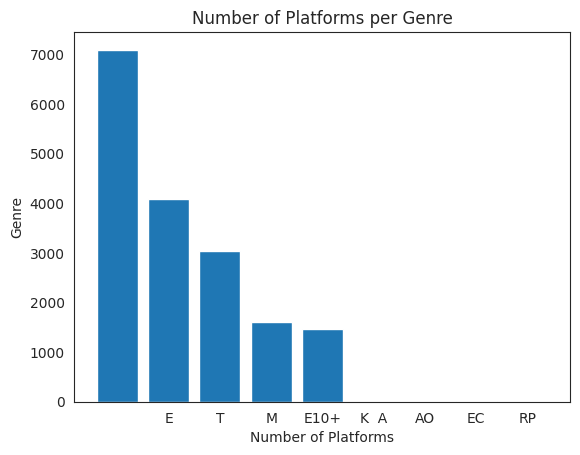

In [ ]:
fig, ax = plt.subplots()

ax.bar(EDA71['Rating'], EDA71['Count_games'])

ax.set_title('Number of Platforms per Genre')
ax.set_xlabel('Number of Platforms')
ax.set_ylabel('Genre')

plt.show()

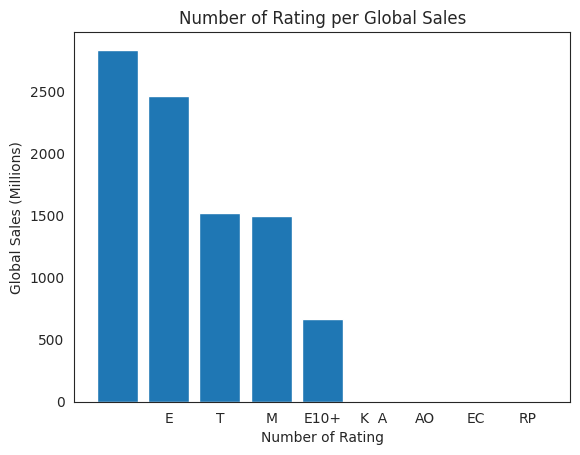

In [ ]:
fig, ax = plt.subplots()

ax.bar(EDA71['Rating'], EDA71['Global_Sales'])

ax.set_title('Number of Rating per Global Sales')
ax.set_xlabel('Number of Rating')
ax.set_ylabel('Global Sales (Millions)')

plt.show()

##Genre per Platform

In [ ]:
EDA81 = df1.groupby(['Genre'],as_index=False).agg({'Platform':'count'}).sort_values(by='Platform', ascending=False)
EDA81

,Genre,Platform
0,Action,3483
10,Sports,2401
3,Misc,1798
7,Role-Playing,1538
1,Adventure,1459
8,Shooter,1347
6,Racing,1276
9,Simulation,918
4,Platform,895
2,Fighting,863


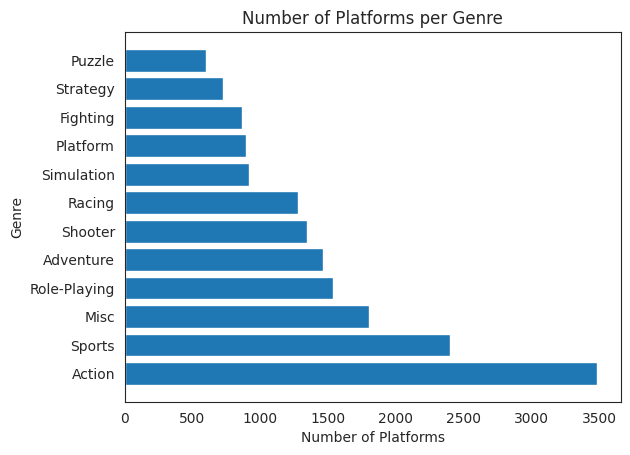

In [ ]:
fig, ax = plt.subplots()

ax.barh(EDA81['Genre'], EDA81['Platform'])

ax.set_title('Number of Platforms per Genre')
ax.set_xlabel('Number of Platforms')
ax.set_ylabel('Genre')

plt.show()

##Sales Per Publisher

In [ ]:
EDA911 = df1.groupby(['Publisher'],as_index=False).agg({'NA_Sales':'sum', 'EU_Sales':'sum', 'JP_Sales':'sum', 'Other_Sales':'sum','Global_Sales':'sum'}).sort_values(by='Global_Sales', ascending=False)
EDA911['Rank'] = EDA911['Global_Sales'].rank(method='dense', ascending=False).astype(int)
EDA911.head(15)


,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rank
384,Nintendo,821.68,423.88,461.88,95.45,1803.00,1
147,Electronic Arts,608.48,378.70,14.43,130.66,1132.43,2
23,Activision,437.65,218.62,6.81,76.82,739.98,3
485,Sony Computer Entertainment,269.00,189.43,74.89,80.83,614.25,4
561,Ubisoft,255.13,164.48,7.66,49.84,477.30,5
526,Take-Two Interactive,225.42,121.00,5.97,56.33,408.69,6
519,THQ,211.96,95.95,5.01,32.48,345.51,7
294,Konami Digital Entertainment,93.74,69.81,92.17,30.16,286.01,8
473,Sega,109.08,81.60,57.50,23.90,272.19,9
370,Namco Bandai Games,71.63,42.97,129.33,14.88,258.84,10
